In [1]:
#Installing relevant libraries:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install missingno

In [2]:
#Importing the installed relevant libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
#Reading the relevant excel dataset into a dataframe
df = pd.read_excel('Public_Transport_Trips_EDA.xlsx')

                    DATA OVERVIEW AND UNDERSTANDING

In [4]:
#To see an overview of the dataset as part of Data understanding
df

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday,NaN,F
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday,NaN,F
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday,NaN,NaN
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday,NaN,NaN
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday,NaN,NaN
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,NaN,NaN


In [5]:
#Data noticed to have 2 additional columns which are not part of the data description handed over by the stakeholder -Unnamed 10 and 11

In [6]:
#Further investigation of the extra columns:
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [7]:
#Further investigation of Unnamed 10 column:
df['Unnamed: 10']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: Unnamed: 10, Length: 1000, dtype: float64

In [8]:
df['Unnamed: 10'].value_counts()

Series([], Name: count, dtype: int64)

In [9]:
#This column contains no values and therefore can be dropped.

In [10]:
#Further investigation of Unnamed 11 column:
df['Unnamed: 11']

0        F
1        F
2        F
3        F
4        F
      ... 
995    NaN
996    NaN
997    NaN
998    NaN
999    NaN
Name: Unnamed: 11, Length: 1000, dtype: object

In [11]:
df['Unnamed: 11'].value_counts()

Unnamed: 11
F    250
T     49
Name: count, dtype: int64

In [12]:
#This column - Unnamed 11 contains some values, however it's not possible to ascertain what these values mean and their relevance to the dataset. 
#Moreover, it's not included in the data dictionary/description handed over by the stakeholders. It can therefore be removed/dropped.

In [13]:
#Still on data overview and understanding
df.shape

(1000, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  Unnamed: 10            0 non-null      float64       
 11  Unnamed: 11            299 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 93.9+

                DATA CLEANING

In [15]:
#Dropping the useless columns:
cleaned_df = df.drop(labels = ['Unnamed: 10','Unnamed: 11'], axis = 1)

In [16]:
cleaned_df

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday
...,...,...,...,...,...,...,...,...,...,...
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday


In [17]:
#Checking for duplicates as part of data cleaning:
cleaned_df.duplicated().sum()

np.int64(0)

In [18]:
#No duplicates found

In [19]:
#Checking for Missing values:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.3+ KB


In [20]:
#From the data info above, missing values identified in column index 5,6 and 7

In [21]:
cleaned_df.isnull().sum()

Trip_ID                    0
Mode_of_Transport          0
Departure_Station          0
Arrival_Station            0
Departure_Time             0
Passenger_Count          100
Fare_Amount              100
Trip_Duration_Minutes    100
Trip_Date                  0
Day_of_Week                0
dtype: int64

In [22]:
#100 missing values in each of the columns affected. Total of 300 missing values

In [23]:
#To further investigate the missing values and see where they are in the data specifically:
pd.set_option('display.max_rows',None)
cleaned_df[cleaned_df.isnull().any(axis=1)]

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday
7,TRIP0008,FERRY,Central,South Point,2024-01-01 06:07:00,9.0,NaN,14.0,2024-01-01,Saturday
21,TRIP0022,train,North Station,South Point,2024-01-01 06:21:00,16.0,NaN,26.0,2024-01-01,Monday
26,TRIP0027,Tram,South Point,South Point,2024-01-01 06:26:00,58.0,16.414037,NaN,2024-01-02,Tuesday
28,TRIP0029,train,Central,Central,2024-01-01 06:28:00,NaN,11.688435,147.0,2024-01-02,Saturday
29,TRIP0030,fErry,North Station,Airport,2024-01-01 06:29:00,20.0,NaN,110.0,2024-01-02,Saturday
30,TRIP0031,Tram,North Station,Airport,2024-01-01 06:30:00,NaN,48.959565,19.0,2024-01-02,Thursday
32,TRIP0033,Bus,Downtown,Airport,2024-01-01 06:32:00,NaN,NaN,171.0,2024-01-02,Wednesday


<Axes: >

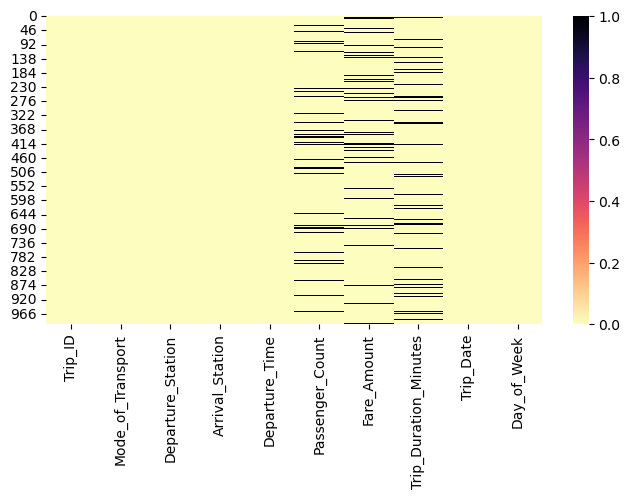

In [24]:
#Visualize missing values:
plt.figure(figsize = (8,4))
sns.heatmap(cleaned_df.isnull(), cbar=True, cmap = 'magma_r')

In [25]:
cleaned_df[cleaned_df.isnull().any(axis=1)].shape

(267, 10)

In [26]:
#267 rows contain all 300 missing values, suggesting that several rows contain more than 1 missing values.
#All 3 columns affected contain numerical data only, therefore missing values may be replaced with the mean or median if no significant outliers present,
#or replaced with the median if significant outliers are present

In [27]:
cleaned_df[['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes']].isnull().sum()

Passenger_Count          100
Fare_Amount              100
Trip_Duration_Minutes    100
dtype: int64

In [28]:
#Statiscal Analysis of the 3 missing data affected columns - (Note that all affected columns contain numerical data only)
cleaned_df[['Passenger_Count', 'Fare_Amount','Trip_Duration_Minutes']].describe()

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes
count,900.000000,900.000000,900.000000
mean,49.154444,25.360742,94.270000
std,27.698270,14.464556,50.634982
min,1.000000,0.500576,5.000000
25%,25.000000,12.818196,49.750000
50%,48.000000,25.403856,97.500000
75%,72.000000,37.866623,138.000000
max,99.000000,49.945184,179.000000


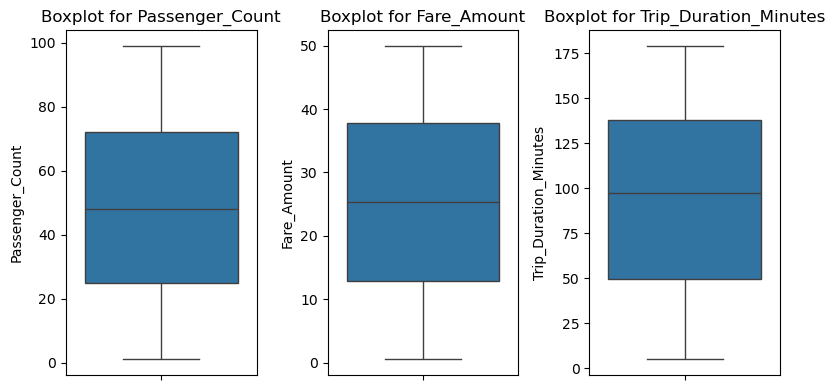

In [29]:
#Further statistical analysis of affected columns using boxplot to detect outliers:
missing_values = ['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes']
fig,ax = plt.subplots(1,3,figsize=(8,4))
ax = ax.flatten()
for idx, col in enumerate(missing_values):
    sns.boxplot(cleaned_df[col],ax = ax[idx])
    ax[idx].set_title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [30]:
#No outliers identified

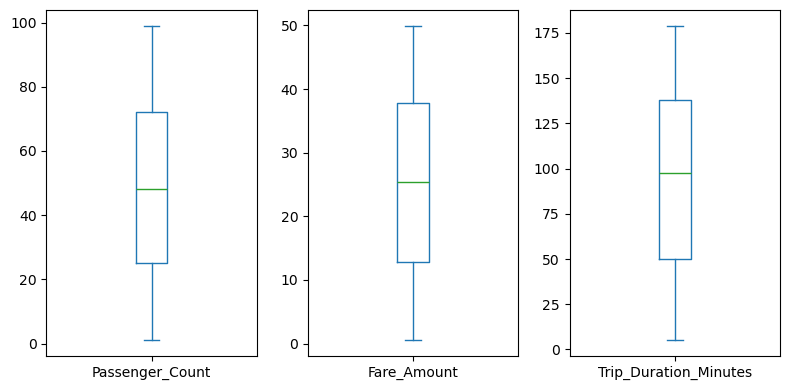

In [31]:
#Using pandas boxplot
cleaned_df[['Passenger_Count','Fare_Amount','Trip_Duration_Minutes']].plot(kind = 'box',subplots = True,figsize = (8,4))
plt.tight_layout()
plt.show()

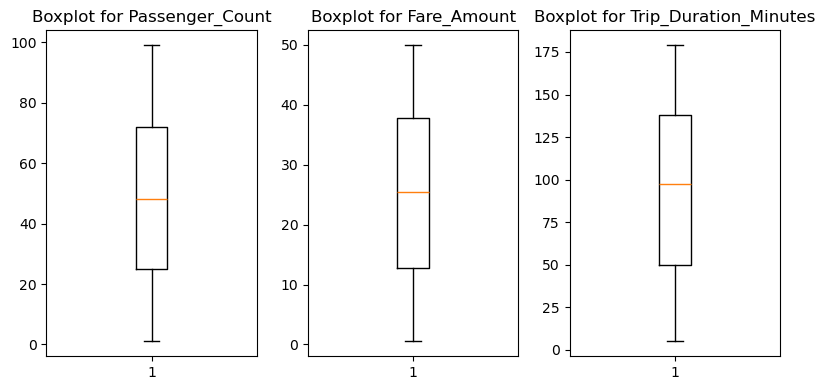

In [32]:
#Using matplotlib boxplot
fig,ax = plt.subplots(1,3,figsize=(8,4))
ax = ax.flatten()
missing_values = ['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes']
for idx, col in enumerate(missing_values):
    ax[idx].boxplot(cleaned_df[col].dropna())
    ax[idx].set_title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [33]:
#Filling Passenger Count column with median value:
cleaned_df['Passenger_Count'] = cleaned_df['Passenger_Count'].fillna(cleaned_df['Passenger_Count'].median())

In [34]:
#Filling Fare Amount column with median value:
cleaned_df['Fare_Amount'] = cleaned_df['Fare_Amount'].fillna(cleaned_df['Fare_Amount'].median())

In [35]:
#Filling Trip_Duration_Minutes column with median value:
cleaned_df['Trip_Duration_Minutes'] = cleaned_df['Trip_Duration_Minutes'].fillna(cleaned_df['Trip_Duration_Minutes'].median())

In [36]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        1000 non-null   float64       
 6   Fare_Amount            1000 non-null   float64       
 7   Trip_Duration_Minutes  1000 non-null   float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.3+ KB


In [37]:
#Column by Column check for Messy/Inconsistent Data:
#Column 1 - Quick Glance
cleaned_df['Trip_ID'].value_counts()

Trip_ID
TRIP1000    1
TRIP0001    1
TRIP0002    1
TRIP0003    1
TRIP0004    1
TRIP0005    1
TRIP0006    1
TRIP0007    1
TRIP0984    1
TRIP0983    1
TRIP0982    1
TRIP0981    1
TRIP0980    1
TRIP0979    1
TRIP0978    1
TRIP0977    1
TRIP0976    1
TRIP0975    1
TRIP0974    1
TRIP0973    1
TRIP0972    1
TRIP0971    1
TRIP0970    1
TRIP0969    1
TRIP0040    1
TRIP0039    1
TRIP0038    1
TRIP0037    1
TRIP0036    1
TRIP0035    1
TRIP0034    1
TRIP0033    1
TRIP0032    1
TRIP0031    1
TRIP0030    1
TRIP0029    1
TRIP0028    1
TRIP0027    1
TRIP0026    1
TRIP0025    1
TRIP0056    1
TRIP0055    1
TRIP0054    1
TRIP0053    1
TRIP0052    1
TRIP0051    1
TRIP0050    1
TRIP0049    1
TRIP0048    1
TRIP0047    1
TRIP0046    1
TRIP0045    1
TRIP0044    1
TRIP0043    1
TRIP0042    1
TRIP0041    1
TRIP0072    1
TRIP0071    1
TRIP0070    1
TRIP0069    1
TRIP0068    1
TRIP0067    1
TRIP0066    1
TRIP0065    1
TRIP0064    1
TRIP0063    1
TRIP0062    1
TRIP0061    1
TRIP0060    1
TRIP0059    1
TRIP0058    

In [38]:
#Checking for Duplicates in Column 1 since they are identification numbers
cleaned_df['Trip_ID'].nunique()

1000

In [39]:
#No duplicates identified. Quick Glance looks alright

In [40]:
#Removing all whitespaces from Column 1
cleaned_df['Trip_ID'] = cleaned_df['Trip_ID'].str.strip()

In [41]:
#Column 2 - Quick Glance
cleaned_df['Mode_of_Transport'].value_counts()

Mode_of_Transport
Bus      147
Tram     138
bus      137
train    123
Train    120
FERRY    119
Ferry    118
fErry     50
BUS       48
Name: count, dtype: int64

In [42]:
#Inconsistent Data Identified

In [43]:
cleaned_df['Mode_of_Transport'] = cleaned_df['Mode_of_Transport'].replace(['BUS','bus'],'Bus') #cleaning inconsistent data

In [44]:
cleaned_df['Mode_of_Transport'].value_counts() #checking to see that cleaning process worked well

Mode_of_Transport
Bus      332
Tram     138
train    123
Train    120
FERRY    119
Ferry    118
fErry     50
Name: count, dtype: int64

In [45]:
cleaned_df['Mode_of_Transport'] = cleaned_df['Mode_of_Transport'].replace(['FERRY','fErry'],'Ferry') #cleaning more inconsistent data

In [46]:
cleaned_df['Mode_of_Transport'].value_counts() #checking to see that cleaning process worked well

Mode_of_Transport
Bus      332
Ferry    287
Tram     138
train    123
Train    120
Name: count, dtype: int64

In [47]:
cleaned_df['Mode_of_Transport'] = cleaned_df['Mode_of_Transport'].replace('train','Train')  #cleaning more inconsistent data

In [48]:
cleaned_df['Mode_of_Transport'].value_counts()  #checking to see that cleaning process worked well

Mode_of_Transport
Bus      332
Ferry    287
Train    243
Tram     138
Name: count, dtype: int64

In [49]:
#Removing all whitespaces from Column 2
cleaned_df['Mode_of_Transport'] = cleaned_df['Mode_of_Transport'].str.strip()

In [50]:
cleaned_df['Mode_of_Transport'].value_counts()

Mode_of_Transport
Bus      332
Ferry    287
Train    243
Tram     138
Name: count, dtype: int64

In [51]:
#Column 3 - Quick Glance
cleaned_df['Departure_Station'].value_counts()

Departure_Station
North Station    171
Downtown         167
West End         159
Central          158
Airport          157
South Point      138
 Central          50
Name: count, dtype: int64

In [52]:
#Inconsistent data due to white spaces noted:

In [53]:
#Removing all whitespaces from Column 3
cleaned_df['Departure_Station'] = cleaned_df['Departure_Station'].str.strip()

In [54]:
cleaned_df['Departure_Station'].value_counts()

Departure_Station
Central          208
North Station    171
Downtown         167
West End         159
Airport          157
South Point      138
Name: count, dtype: int64

In [55]:
#White spaces have been removed thus eliminating the inconsistent data

In [56]:
#Column 4 - Quick Glance
cleaned_df['Arrival_Station'].value_counts()

Arrival_Station
South Point      171
Downtown         168
West End         163
Airport          163
Central          160
North Station    125
airport           50
Name: count, dtype: int64

In [57]:
#Inconsistent data noted

In [58]:
cleaned_df['Arrival_Station'] = cleaned_df['Arrival_Station'].replace('airport','Airport')  #cleaning the inconsistent data

In [59]:
cleaned_df['Arrival_Station'].value_counts()  #checking to see that the cleaning process worked well

Arrival_Station
Airport          213
South Point      171
Downtown         168
West End         163
Central          160
North Station    125
Name: count, dtype: int64

In [60]:
#Removing all edge whitespaces from Column 4
cleaned_df['Arrival_Station'] = cleaned_df['Arrival_Station'].str.strip()

In [61]:
cleaned_df['Arrival_Station'].value_counts()

Arrival_Station
Airport          213
South Point      171
Downtown         168
West End         163
Central          160
North Station    125
Name: count, dtype: int64

In [62]:
#Column 5 - Quick Glance
cleaned_df['Departure_Time'].value_counts()

Departure_Time
2024-01-01 22:39:00    1
2024-01-01 06:00:00    1
2024-01-01 06:01:00    1
2024-01-01 06:02:00    1
2024-01-01 06:03:00    1
2024-01-01 06:04:00    1
2024-01-01 06:05:00    1
2024-01-01 06:06:00    1
2024-01-01 22:23:00    1
2024-01-01 22:22:00    1
2024-01-01 22:21:00    1
2024-01-01 22:20:00    1
2024-01-01 22:19:00    1
2024-01-01 22:18:00    1
2024-01-01 22:17:00    1
2024-01-01 22:16:00    1
2024-01-01 22:15:00    1
2024-01-01 22:14:00    1
2024-01-01 22:13:00    1
2024-01-01 22:12:00    1
2024-01-01 22:11:00    1
2024-01-01 22:10:00    1
2024-01-01 22:09:00    1
2024-01-01 22:08:00    1
2024-01-01 06:39:00    1
2024-01-01 06:38:00    1
2024-01-01 06:37:00    1
2024-01-01 06:36:00    1
2024-01-01 06:35:00    1
2024-01-01 06:34:00    1
2024-01-01 06:33:00    1
2024-01-01 06:32:00    1
2024-01-01 06:31:00    1
2024-01-01 06:30:00    1
2024-01-01 06:29:00    1
2024-01-01 06:28:00    1
2024-01-01 06:27:00    1
2024-01-01 06:26:00    1
2024-01-01 06:25:00    1
2024-01-01

In [63]:
cleaned_df['Departure_Time'].duplicated().sum()

np.int64(0)

In [64]:
#Column 6 - Quick Glance
cleaned_df['Passenger_Count'].value_counts()

Passenger_Count
48.0    112
47.0     18
21.0     17
19.0     16
92.0     15
35.0     15
41.0     15
70.0     14
46.0     14
86.0     14
64.0     14
82.0     13
30.0     13
49.0     13
4.0      13
28.0     13
37.0     12
45.0     12
20.0     12
15.0     12
39.0     12
51.0     12
11.0     12
57.0     11
88.0     11
75.0     11
12.0     11
24.0     11
26.0     11
3.0      11
55.0     11
98.0     11
73.0     11
91.0     10
14.0     10
40.0     10
68.0     10
76.0     10
85.0     10
63.0     10
84.0     10
17.0     10
33.0     10
54.0      9
36.0      9
58.0      9
69.0      9
34.0      9
60.0      9
38.0      9
81.0      9
72.0      9
99.0      9
25.0      9
61.0      9
65.0      8
8.0       8
67.0      8
9.0       8
90.0      8
27.0      8
66.0      8
74.0      7
56.0      7
13.0      7
53.0      7
16.0      7
42.0      7
50.0      7
94.0      7
93.0      7
23.0      7
7.0       7
62.0      7
87.0      7
6.0       6
32.0      6
78.0      6
59.0      6
44.0      6
1.0       6
22.0      6


In [65]:
#Missing values already addressed. No inconsistencies or errors noted

In [66]:
pd.reset_option('display.max_rows')  #resetting rows displayed to default mode

In [67]:
#Column 7 - Quick Glance
#pd.set_option('display.max_rows',None)
cleaned_df['Fare_Amount'].value_counts()

Fare_Amount
25.403856    100
5.994406       1
48.779485      1
46.496789      1
48.404193      1
            ... 
10.920094      1
40.546670      1
7.772635       1
43.300617      1
3.767487       1
Name: count, Length: 901, dtype: int64

In [68]:
#Column 8 - Quick Glance
cleaned_df['Trip_Duration_Minutes'].value_counts()

Trip_Duration_Minutes
97.5     100
26.0      11
103.0     11
100.0     10
36.0      10
        ... 
60.0       1
59.0       1
95.0       1
121.0      1
137.0      1
Name: count, Length: 175, dtype: int64

In [69]:
#Quick glance looks alright. No inconsistencies or messy data identified

In [70]:
#Column 9 - Quick Glance
cleaned_df['Trip_Date'].value_counts()

Trip_Date
2024-01-01    24
2024-01-02    24
2024-01-03    24
2024-01-04    24
2024-01-05    24
2024-01-06    24
2024-01-07    24
2024-01-08    24
2024-01-09    24
2024-01-10    24
2024-01-11    24
2024-01-12    24
2024-01-13    24
2024-01-14    24
2024-01-15    24
2024-01-16    24
2024-01-17    24
2024-01-18    24
2024-01-19    24
2024-01-20    24
2024-01-21    24
2024-01-22    24
2024-01-23    24
2024-01-24    24
2024-01-25    24
2024-01-26    24
2024-01-27    24
2024-01-28    24
2024-01-29    24
2024-01-30    24
2024-01-31    24
2024-02-01    24
2024-02-02    24
2024-02-03    24
2024-02-04    24
2024-02-05    24
2024-02-06    24
2024-02-07    24
2024-02-08    24
2024-02-09    24
2024-02-10    24
2024-02-11    16
Name: count, dtype: int64

In [71]:
#Quick glance looks alright. No inconsistencies or messy data identified

In [72]:
#Column 10 - Quick Glance
cleaned_df['Day_of_Week'].value_counts()

Day_of_Week
Sunday       167
Tuesday      147
Saturday     146
Monday       142
Friday       142
Wednesday    138
Thursday     118
Name: count, dtype: int64

In [73]:
#No messy or inconsistent data noted

In [74]:
#Removing all edge whitespaces from Column 10
cleaned_df['Day_of_Week'] = cleaned_df['Day_of_Week'].str.strip()

In [75]:
cleaned_df['Day_of_Week'].value_counts()  #checking to see that the code ran without developing new issues

Day_of_Week
Sunday       167
Tuesday      147
Saturday     146
Monday       142
Friday       142
Wednesday    138
Thursday     118
Name: count, dtype: int64

In [76]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        1000 non-null   float64       
 6   Fare_Amount            1000 non-null   float64       
 7   Trip_Duration_Minutes  1000 non-null   float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 78.3+ KB


In [77]:
#Preliminary Data Cleaning Process completed

        DATA EXPLORATION AND ANALYSIS

In [78]:
cleaned_df.describe()

,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,1000.000000,1000.000000,1000.000000,1000
mean,2024-01-01 14:19:30,49.039000,25.365053,94.593000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,28.000000,13.917364,55.000000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,48.000000,25.403856,97.500000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,70.000000,36.580122,132.250000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,26.277709,13.721526,48.043673,NaN


In [79]:
#Question 1: What is the time period during which the data was gathered?

#As seen in the statistical description of data details above, 
#the departure time and Trip_Date suggest different time periods during which data gathering occured. 

#While the Departure_Time suggests that data was gathered all from one calendar day within the period of about 16hrs, i.e 
#on the 1st of January 2024, from 06:00:00hrs to 22:39:00hrs, 

#the Trip_Date suggests that data was gathered within the period of about 42 days(6weeks), i.e  
#between the 1st of January, 2024 and the 11th of February, 2024. 

print(f"First Trip recorded in the dataset based on departure time = {cleaned_df['Departure_Time'].min()}")
print(f"Last Trip recorded in the dataset based on departure time = {cleaned_df['Departure_Time'].max()}\n")
print(f"First Trip recorded in the dataset based on Trip date = {cleaned_df['Trip_Date'].min()}")
print(f"Last Trip recorded in the data set based on Trip date = {cleaned_df['Trip_Date'].max()}")

First Trip recorded in the dataset based on departure time = 2024-01-01 06:00:00
Last Trip recorded in the dataset based on departure time = 2024-01-01 22:39:00

First Trip recorded in the dataset based on Trip date = 2024-01-01 00:00:00
Last Trip recorded in the data set based on Trip date = 2024-02-11 00:00:00


In [80]:
#Since both time periods cannot be correct, it therefore makes sense to ignore one and focus on the most plausible option.

#From analysis of the dataset, considering that Days of the week were included, 
#it seems more realistic that all 1000 trips occured over a period of 42 days, rather than 1 day.
#In view of this, the Departure_Date column would be ignored, thus utilising only the Trip_Date column for Time series analysis.

In [81]:
cleaned_df.head(10)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Tuesday
3,TRIP0004,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday
5,TRIP0006,Ferry,South Point,South Point,2024-01-01 06:05:00,41.0,5.994406,50.0,2024-01-01,Thursday
6,TRIP0007,Bus,West End,West End,2024-01-01 06:06:00,13.0,40.507643,100.0,2024-01-01,Saturday
7,TRIP0008,Ferry,Central,South Point,2024-01-01 06:07:00,9.0,25.403856,14.0,2024-01-01,Saturday
8,TRIP0009,Train,West End,North Station,2024-01-01 06:08:00,36.0,4.079666,172.0,2024-01-01,Saturday
9,TRIP0010,Ferry,Central,South Point,2024-01-01 06:09:00,86.0,47.778203,132.0,2024-01-01,Wednesday


In [82]:
#Looking closely at the dataset, Day of the Week column is noticed to be incorrect and inconsistent with the Trip Day column.

cleaned_df['Weekday'] = cleaned_df['Trip_Date'].dt.day_name()  #Extracting the correct weekday from Trip_Date

del cleaned_df['Day_of_Week']  #Deleting the incorrect weekday column 

cleaned_df

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Weekday
0,TRIP0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Monday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Monday
2,TRIP0003,Bus,Central,North Station,2024-01-01 06:02:00,91.0,25.403856,97.5,2024-01-01,Monday
3,TRIP0004,Ferry,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,97.5,2024-01-01,Monday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,25.403856,97.5,2024-01-01,Monday
...,...,...,...,...,...,...,...,...,...,...
995,TRIP0996,Train,North Station,West End,2024-01-01 22:35:00,48.0,40.546670,51.0,2024-02-11,Sunday
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Sunday
997,TRIP0998,Ferry,West End,North Station,2024-01-01 22:37:00,23.0,25.403856,8.0,2024-02-11,Sunday
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday


In [83]:
#Queston 2: Show a comparison of the availability of the various modes of transport 
            #a. overall over the period in view 
            #b. on average per day
            #c. Which mode of transport is most commonly available?

In [84]:
desc = cleaned_df["Mode_of_Transport"].value_counts().index

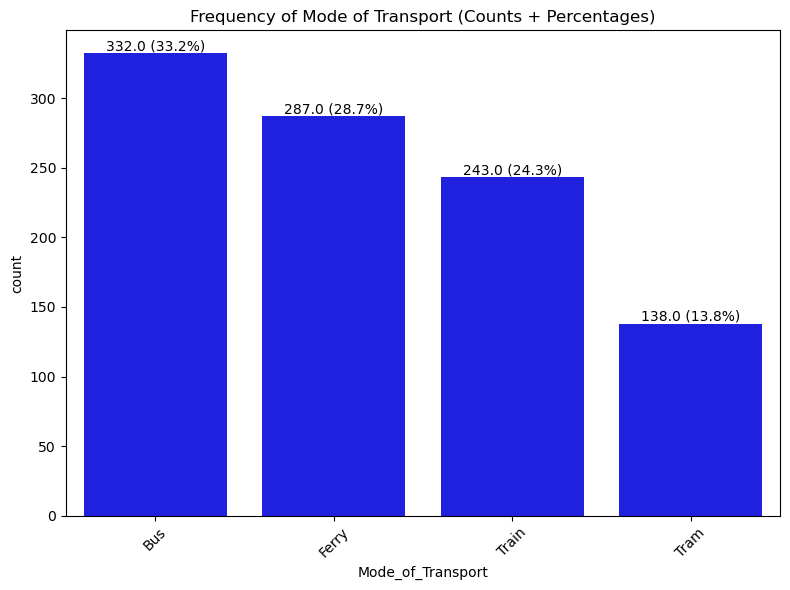

In [85]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Mode_of_Transport", 
                   data=cleaned_df,
                   order=cleaned_df['Mode_of_Transport'].value_counts().index,
                   color="blue")

total = len(cleaned_df['Mode_of_Transport'])

# Format: "count (xx.x%)"
labels = [f'{c.get_height()} ({100*c.get_height()/total:.1f}%)' for c in ax.containers[0]]

ax.bar_label(ax.containers[0], labels=labels)

plt.xticks(rotation=45)
plt.title("Frequency of Mode of Transport (Counts + Percentages)")
plt.tight_layout()
plt.show()

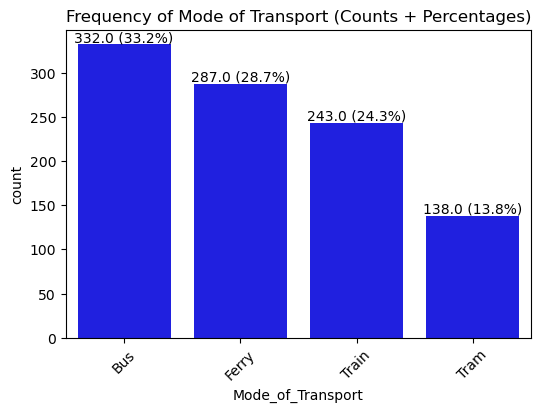

In [86]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Mode_of_Transport", data=cleaned_df,
                   order=cleaned_df['Mode_of_Transport'].value_counts().index,
                   color="blue")

# Total observations
total = len(cleaned_df['Mode_of_Transport'])

# Add count + percentage labels
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    label = f'{count} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title("Frequency of Mode of Transport (Counts + Percentages)")
plt.show()

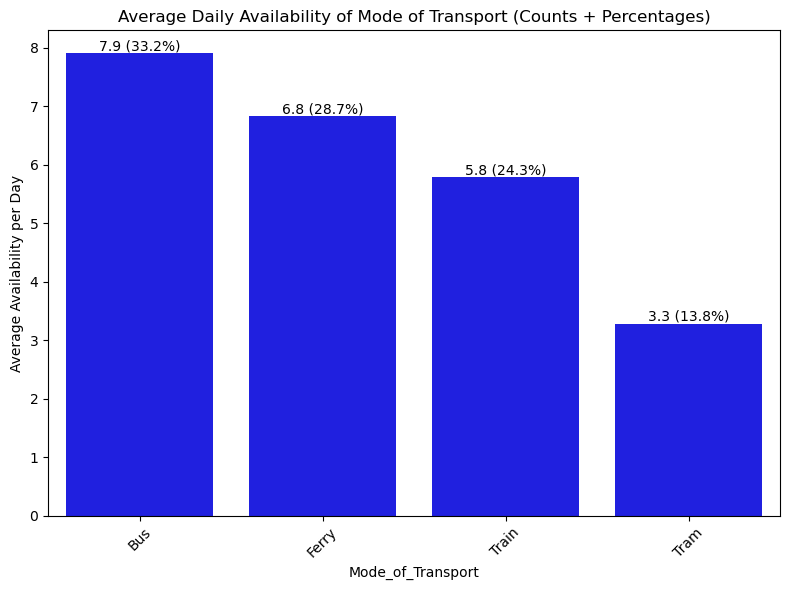

In [87]:
# Count trips per day per mode
daily_counts = (
    cleaned_df.groupby(['Trip_Date', 'Mode_of_Transport'])
    .size()
    .reset_index(name='count')
)

# Create full calendar of dates × modes
all_dates = pd.date_range(cleaned_df['Trip_Date'].min(), cleaned_df['Trip_Date'].max())
all_modes = cleaned_df['Mode_of_Transport'].unique()

full_grid = pd.MultiIndex.from_product([all_dates, all_modes], names=['Trip_Date','Mode_of_Transport']).to_frame(index=False)

# Merge with actual counts, fill missing with 0
daily_counts_full = (
    full_grid.merge(daily_counts, on=['Trip_Date','Mode_of_Transport'], how='left')
    .fillna({'count':0})
)

# Average per day across full calendar
avg_counts = (
    daily_counts_full.groupby('Mode_of_Transport')['count']
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x=avg_counts.index, 
    y=avg_counts.values, 
    color="blue"
)

# Add labels in format "count (xx.x%)"
total_avg = avg_counts.sum()
labels = [f'{v:.1f} ({100*v/total_avg:.1f}%)' for v in avg_counts.values]
ax.bar_label(ax.containers[0], labels=labels)

plt.xticks(rotation=45)
plt.ylabel("Average Availability per Day")
plt.title("Average Daily Availability of Mode of Transport (Counts + Percentages)")
plt.tight_layout()
plt.show()

In [88]:
#Insight - Buses are the most commonly available modes of transport followed by Ferry, Train, and Tram in that order
#both on average per day, as well as overall for the entire time period in view

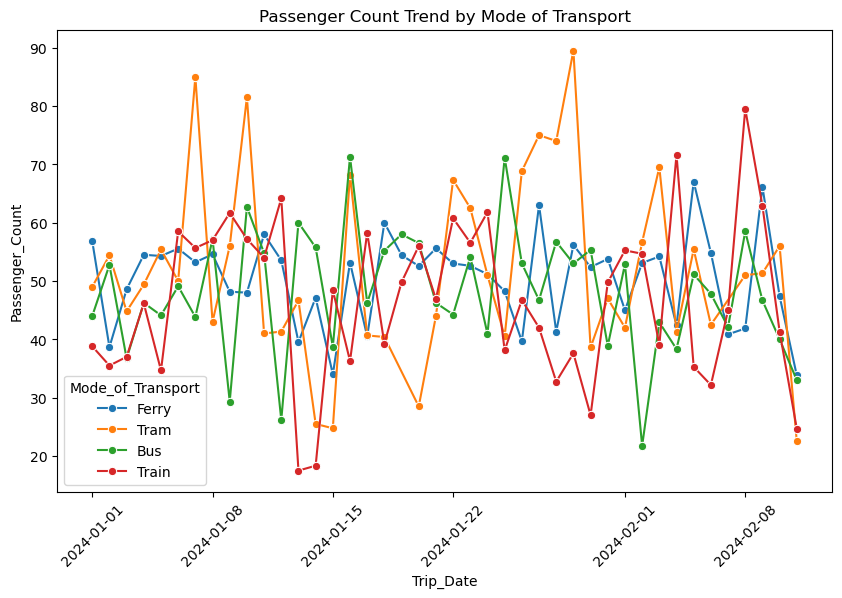

In [89]:
#Question 3: Show the trend of the modes of transport utilisation by passengers over the specified time period?

plt.figure(figsize=(10,6))
sns.lineplot(
    data=cleaned_df,
    x='Trip_Date',
    y='Passenger_Count',
    hue='Mode_of_Transport',   # separate line per transport mode
    marker='o',
    errorbar=None 
)

plt.title("Passenger Count Trend by Mode of Transport")
plt.xticks(rotation=45)
plt.show()

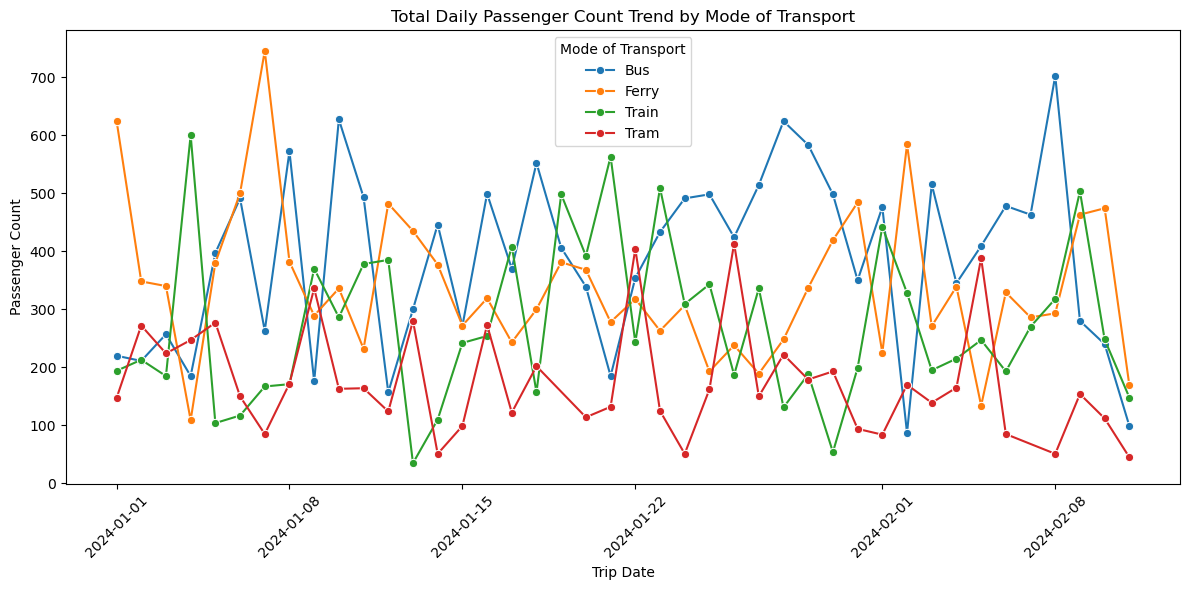

In [90]:
# Sum passenger count per Trip_Date and Mode_of_Transport
agg_df = cleaned_df.groupby(['Trip_Date', 'Mode_of_Transport'], as_index=False)['Passenger_Count'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=agg_df,
    x='Trip_Date',
    y='Passenger_Count',
    hue='Mode_of_Transport',
    marker="o",   # show points
    errorbar=None       # removes confidence interval shading
)

plt.title("Total Daily Passenger Count Trend by Mode of Transport")
plt.xlabel("Trip Date")
plt.ylabel("Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Mode of Transport")
plt.tight_layout()
plt.show()

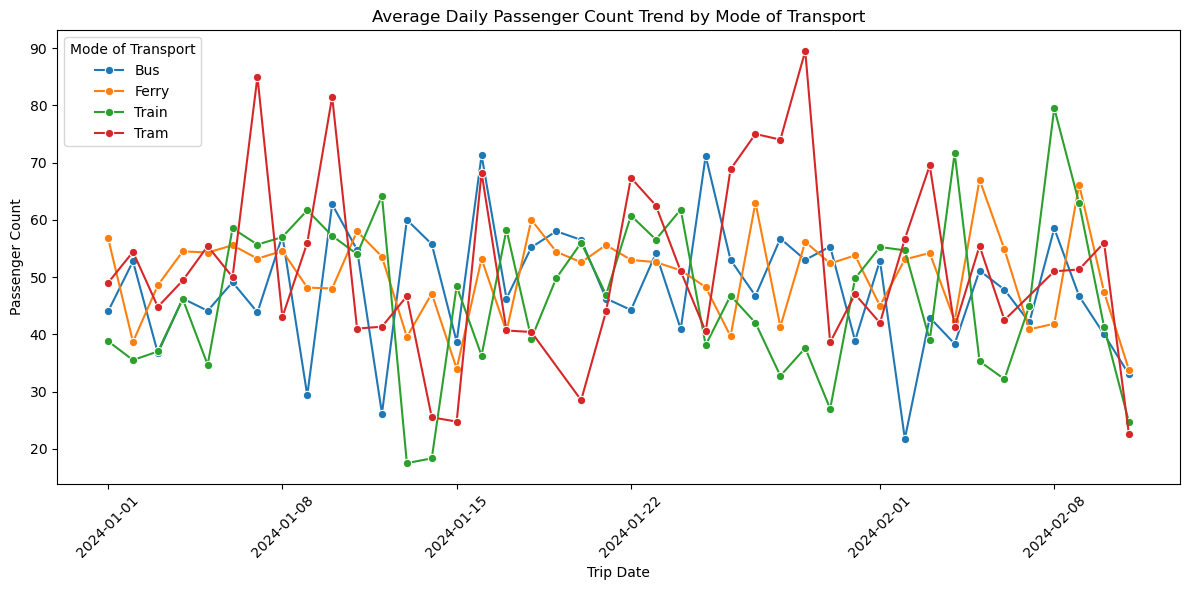

In [91]:
# Average passenger count per trip per day per mode
agg_df = cleaned_df.groupby(['Trip_Date', 'Mode_of_Transport'], as_index=False)['Passenger_Count'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=agg_df,
    x='Trip_Date',
    y='Passenger_Count',
    hue='Mode_of_Transport',
    marker="o",   # show points
    errorbar=None       # removes confidence interval shading
)

plt.title("Average Daily Passenger Count Trend by Mode of Transport")
plt.xlabel("Trip Date")
plt.ylabel("Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Mode of Transport")
plt.tight_layout()
plt.show()

In [92]:
#Question 4: Show a comparison of:
            #a. Overall Total passenger count for each mode of transport over the period in view
            #b. Average passenger count per trip for each mode of transport

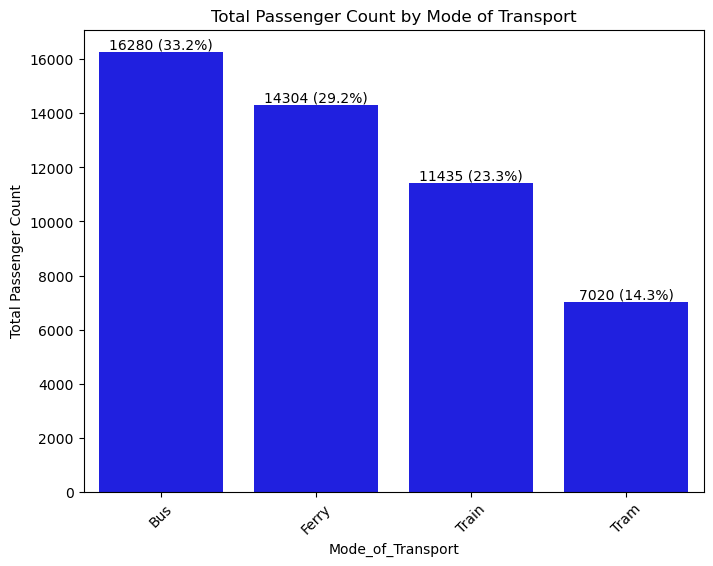

In [93]:
# Aggregate total passengers per mode
agg_total = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Passenger_Count'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Passenger_Count',
    data=agg_total,
    color='blue',
    order=agg_total.sort_values('Passenger_Count', ascending=False)['Mode_of_Transport']
)

# Add labels (count + percentage of total passengers)
total_passengers = agg_total['Passenger_Count'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_passengers
    label = f'{int(count)} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Total Passenger Count")
plt.title("Total Passenger Count by Mode of Transport")
plt.show()

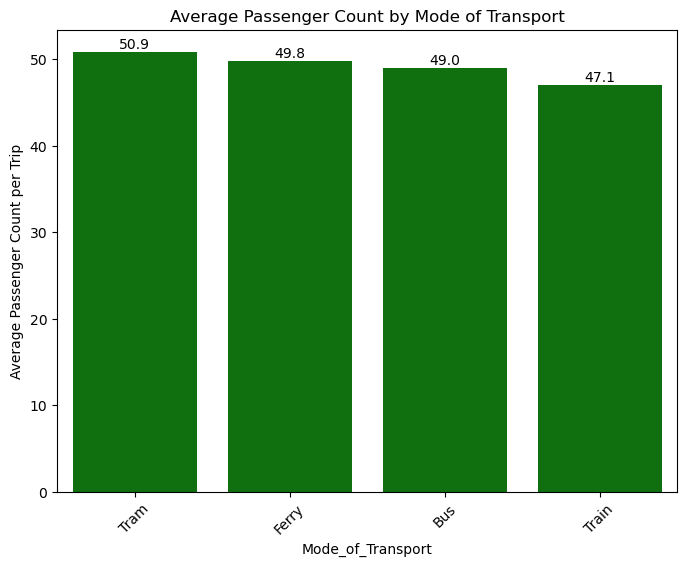

In [94]:
# Aggregate average passengers per trip per mode
agg_avg = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Passenger_Count'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Passenger_Count',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Passenger_Count', ascending=False)['Mode_of_Transport']
)

# Add labels (average count per trip)
for p in ax.patches:
    label = f'{p.get_height():.1f}'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Passenger Count per Trip")
plt.title("Average Passenger Count by Mode of Transport")
plt.show()

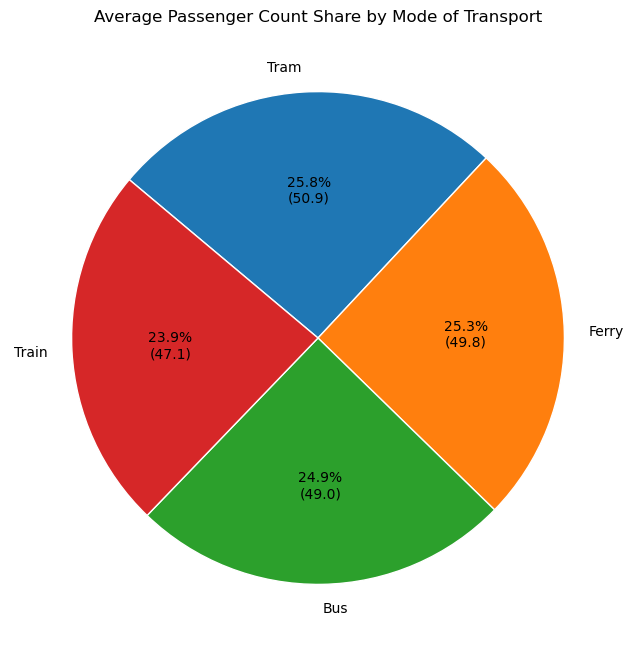

In [95]:
# Aggregate average passengers per trip per mode
agg_avg = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Passenger_Count'].mean()

# Sort values for consistency (optional)
agg_avg = agg_avg.sort_values('Passenger_Count', ascending=False)

# Custom label function
def autopct_format(pct, all_vals):
    absolute = pct/100. * sum(all_vals)
    return f"{pct:.1f}%\n({absolute:.1f})"   # percentage + actual value

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    agg_avg['Passenger_Count'],
    labels=agg_avg['Mode_of_Transport'],
    autopct=lambda pct: autopct_format(pct, agg_avg['Passenger_Count']),
    startangle=140,
    counterclock=False,
    wedgeprops={'edgecolor':'white'}
)

plt.title("Average Passenger Count Share by Mode of Transport")
plt.show()

In [96]:
#Insight: The overall passenger count displays a positive correlation with the degree of availability of the mode of transport 
        #with Buses having the highest count followed by Ferry, Train and Tram in that order. 

        #However, on average per trip, more passengers utilised Trams while Trains were the least utilised possibly due to higher cost.

In [97]:
#Question 5: Comparison of cost of mode of transport

In [98]:
cleaned_df['Trip_Revenue']= cleaned_df['Fare_Amount'] * cleaned_df['Passenger_Count']

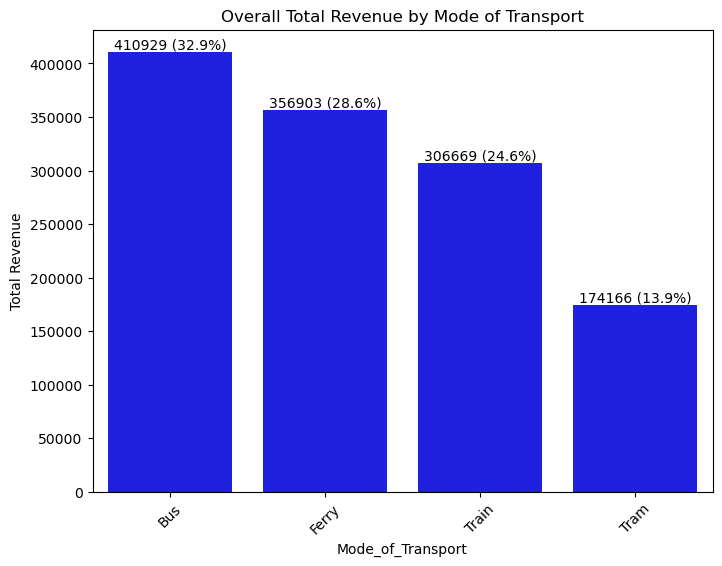

In [99]:
# Aggregate total revenue per mode of transport
agg_total = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Trip_Revenue'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Trip_Revenue',
    data=agg_total,
    color='blue',
    order=agg_total.sort_values('Trip_Revenue', ascending=False)['Mode_of_Transport']
)

# Add labels (amount + percentage of total revenue)
total_revenue = agg_total['Trip_Revenue'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_revenue
    label = f'{int(count)} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Total Revenue")
plt.title("Overall Total Revenue by Mode of Transport")
plt.show()

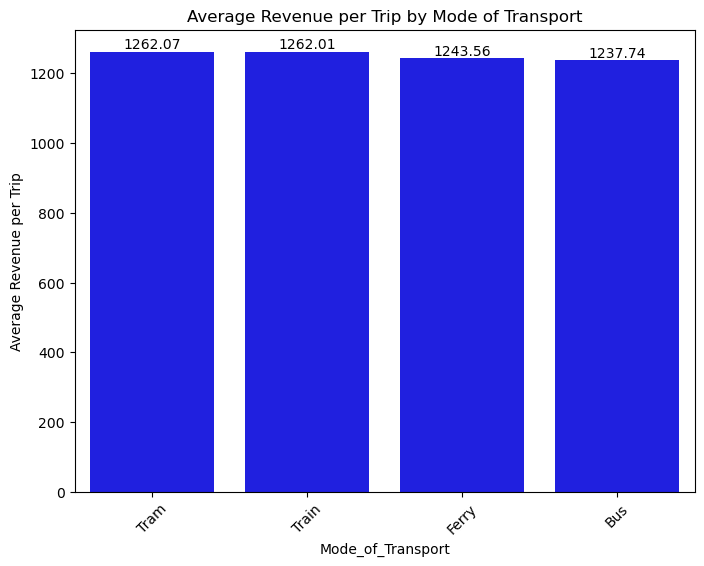

In [100]:
# Aggregate average revenue per mode of transport
agg_avg = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Trip_Revenue'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Trip_Revenue',
    data=agg_avg,
    color='blue',
    order=agg_avg.sort_values('Trip_Revenue', ascending=False)['Mode_of_Transport']
)

# Add labels (average revenue values only)
for p in ax.patches:
    count = p.get_height()
    label = f'{count:.2f}'   # show average revenue to 2 decimals
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Revenue per Trip")
plt.title("Average Revenue per Trip by Mode of Transport")
plt.show()

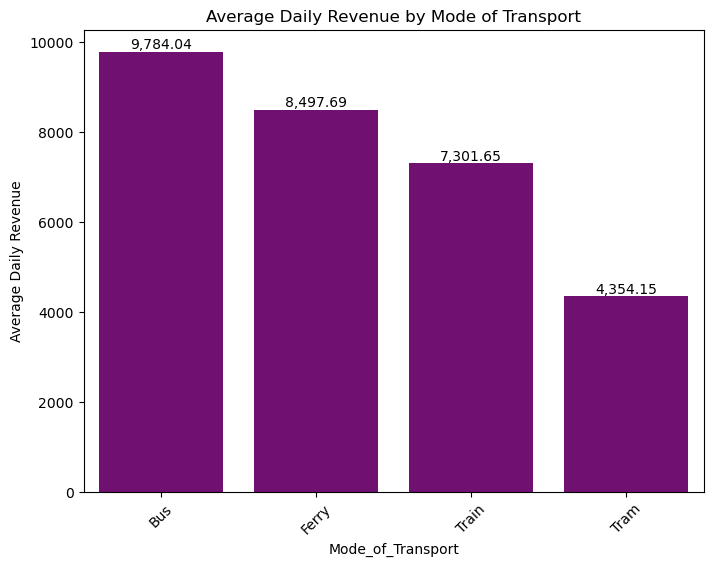

In [101]:
# Step 1: Get daily total revenue per mode
daily_mode_revenue = cleaned_df.groupby(
    ['Mode_of_Transport', 'Trip_Date'], as_index=False
)['Trip_Revenue'].sum()

# Step 2: Compute average daily revenue per mode
avg_daily_revenue = daily_mode_revenue.groupby(
    'Mode_of_Transport', as_index=False
)['Trip_Revenue'].mean()

# Step 3: Plot average daily revenue per mode
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Trip_Revenue',
    data=avg_daily_revenue,
    color='purple',
    order=avg_daily_revenue.sort_values('Trip_Revenue', ascending=False)['Mode_of_Transport']
)

# Add labels
for p in ax.patches:
    value = p.get_height()
    label = f'{value:,.2f}'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., value),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Daily Revenue")
plt.title("Average Daily Revenue by Mode of Transport")
plt.show()

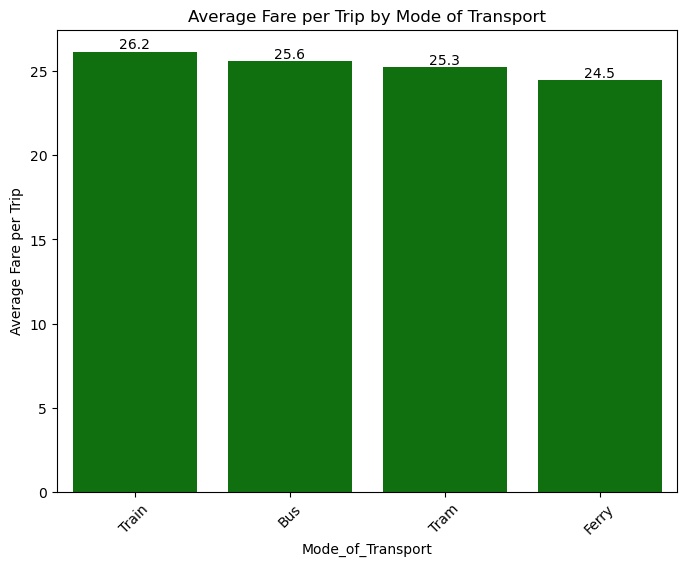

In [102]:
# Aggregate average fare per trip per mode of transport
agg_avg = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Fare_Amount'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Fare_Amount',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Fare_Amount', ascending=False)['Mode_of_Transport']
)

# Add labels (average count per trip)
for p in ax.patches:
    label = f'{p.get_height():.1f}'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Fare per Trip")
plt.title("Average Fare per Trip by Mode of Transport")
plt.show()

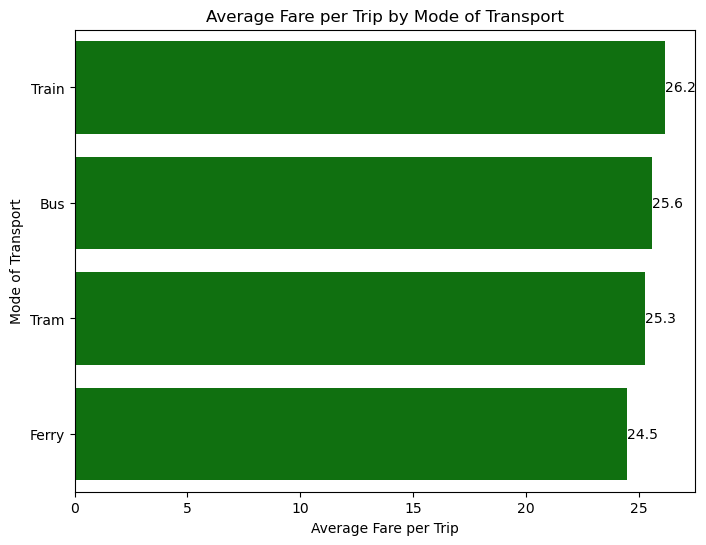

In [103]:
# Aggregate average fare per trip per mode of transport
agg_avg = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Fare_Amount'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Fare_Amount',
    y='Mode_of_Transport',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Fare_Amount', ascending=False)['Mode_of_Transport'],
    orient='h'   # this makes it horizontal
)

# Add labels (average fare per trip)
for p in ax.patches:
    width = p.get_width()
    label = f'{width:.1f}'
    ax.annotate(label,
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center')

plt.xlabel("Average Fare per Trip")
plt.ylabel("Mode of Transport")
plt.title("Average Fare per Trip by Mode of Transport")
plt.show()

In [104]:
#Insight: Again, just like the passenger count, as expected, the average daily revenue and overall total revenue per mode of transport has a 
            #positive correlation with the degree of availability of the transport mode. Bus mode of transport garnered the most overall total revenue 
            #at approx. 411k units while Ferry, Train and Tram followed in that order.

        #However, when examined in terms of revenue per trip on average, Trams had the highest revenue 
        #perhaps due to more passenger utilisation on average, followed very closely by the Trains

        #On average the fare per trip seemed to be slightly cheaper with Ferry, followed by Tram, Bus and then Train in that order 
        #thus making Ferries the cheapest mode of transport overall.

In [105]:
#Question 6: Comparison of Fares per minute for the various Modes of Transport

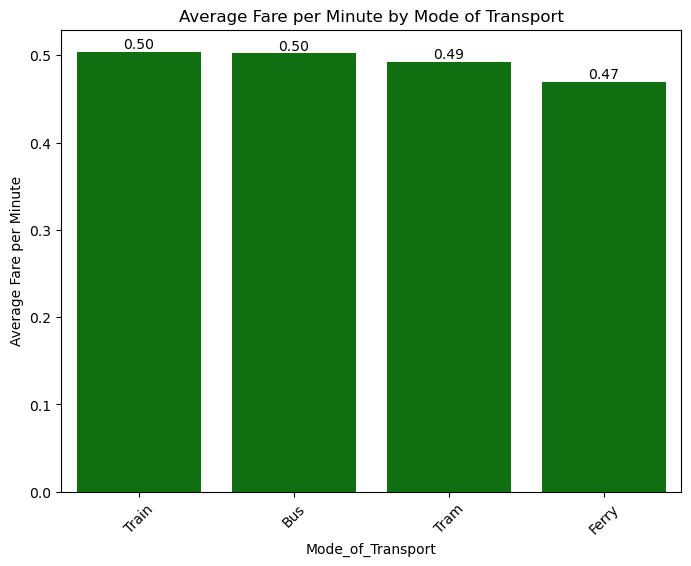

In [106]:
# Compute fare per minute for each trip
cleaned_df['Fare_per_Minute'] = cleaned_df['Fare_Amount'] / cleaned_df['Trip_Duration_Minutes']

# Aggregate average fare per minute per mode of transport
agg_avg = (
    cleaned_df.groupby('Mode_of_Transport', as_index=False)['Fare_per_Minute']
    .mean()
)

# Sort for plotting
order = agg_avg.sort_values('Fare_per_Minute', ascending=False)['Mode_of_Transport']

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Fare_per_Minute',
    data=agg_avg,
    color='green',
    order=order
)

# Add labels (average fare per minute)
for p in ax.patches:
    label = f'{p.get_height():.2f}'   # keep 2 decimal places
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Fare per Minute")
plt.title("Average Fare per Minute by Mode of Transport")
plt.show()

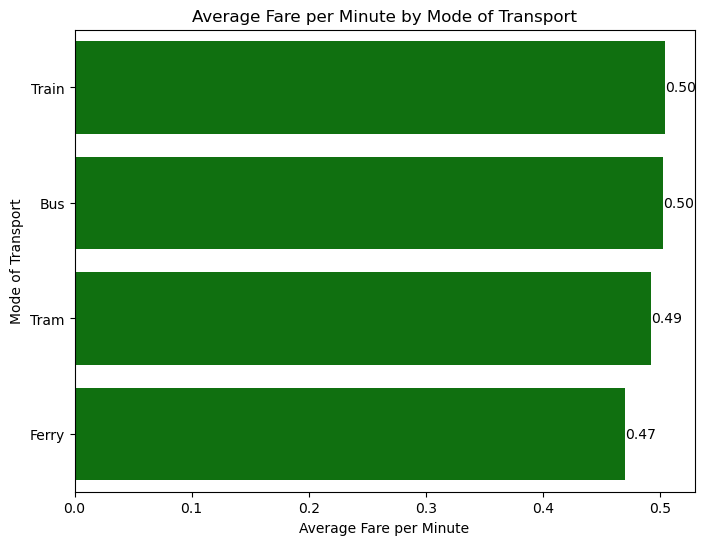

In [107]:
# Compute fare per minute for each trip
cleaned_df['Fare_per_Minute'] = cleaned_df['Fare_Amount'] / cleaned_df['Trip_Duration_Minutes']

# Aggregate average fare per minute per mode of transport
agg_avg = (
    cleaned_df.groupby('Mode_of_Transport', as_index=False)['Fare_per_Minute']
    .mean()
)

# Sort for plotting
order = agg_avg.sort_values('Fare_per_Minute', ascending=False)['Mode_of_Transport']

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Fare_per_Minute',
    y='Mode_of_Transport',
    data=agg_avg,
    color='green',
    order=order,
    orient='h'   # makes it horizontal
)

# Add labels (average fare per minute)
for p in ax.patches:
    width = p.get_width()
    label = f'{width:.2f}'   # keep 2 decimal places
    ax.annotate(label,
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center')

plt.xlabel("Average Fare per Minute")
plt.ylabel("Mode of Transport")
plt.title("Average Fare per Minute by Mode of Transport")
plt.show()

In [108]:
#Insight: On a per minute basis, Ferry remained the cheapest mode of transport, followed by Tram, Bus and Train in that order

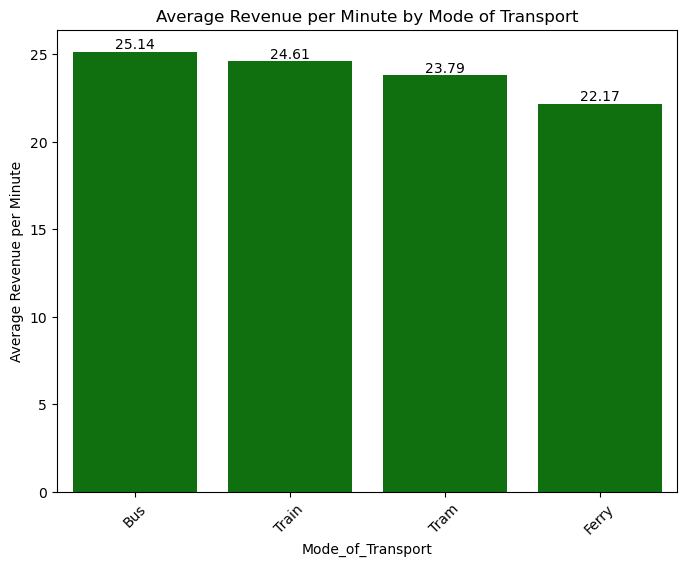

In [109]:
# Compute revenue per minute for each trip
cleaned_df['Revenue_per_Minute'] = cleaned_df['Trip_Revenue'] / cleaned_df['Trip_Duration_Minutes']

# Aggregate average revenue per minute per mode of transport
agg_avg = (
    cleaned_df.groupby('Mode_of_Transport', as_index=False)['Revenue_per_Minute']
    .mean()
)

# Sort for plotting
order = agg_avg.sort_values('Revenue_per_Minute', ascending=False)['Mode_of_Transport']

# Plot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Revenue_per_Minute',
    data=agg_avg,
    color='green',
    order=order
)

# Add labels (average revenue per minute)
for p in ax.patches:
    label = f'{p.get_height():.2f}'   # show 2 decimal places
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Revenue per Minute")
plt.title("Average Revenue per Minute by Mode of Transport")
plt.show()

In [110]:
#Insight: Buses generated the most revenue per minute on average, followed by Trains, Trams and Ferry in that order

In [111]:
#Question 7: Comparison of Trip Duration for the various Modes of Transport

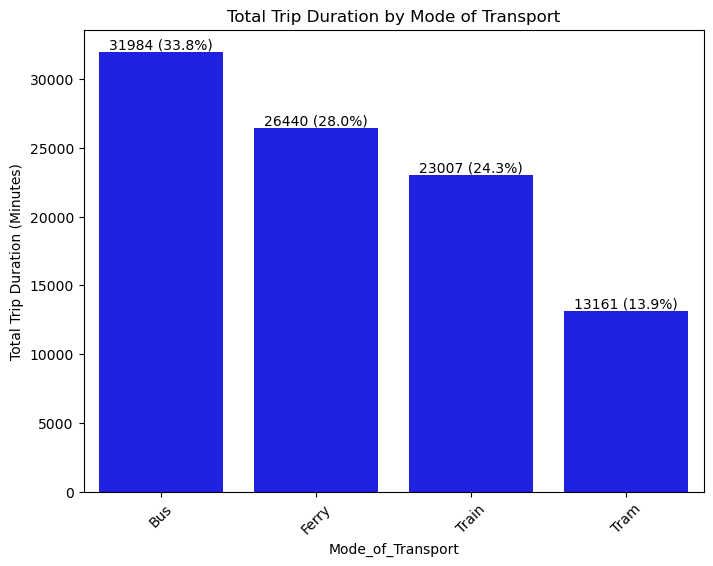

In [112]:
# Aggregate total trip duration per mode of transport
agg_total = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Trip_Duration_Minutes'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Trip_Duration_Minutes',
    data=agg_total,
    color='blue',
    order=agg_total.sort_values('Trip_Duration_Minutes', ascending=False)['Mode_of_Transport']
)

# Add labels (count + percentage of total passengers)
total_fare = agg_total['Trip_Duration_Minutes'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_fare
    label = f'{int(count)} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Total Trip Duration (Minutes)")
plt.title("Total Trip Duration by Mode of Transport")
plt.show()

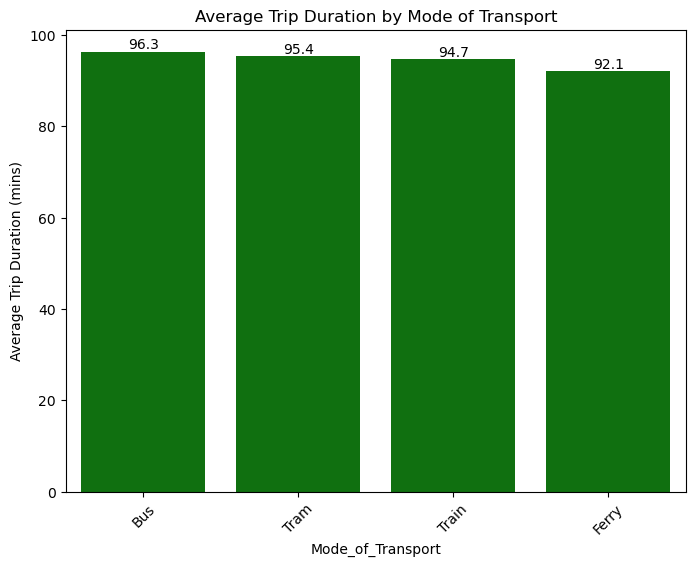

In [113]:
# Aggregate average duration per trip per mode of transport
agg_avg = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Trip_Duration_Minutes'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Mode_of_Transport',
    y='Trip_Duration_Minutes',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Trip_Duration_Minutes', ascending=False)['Mode_of_Transport']
)

# Add labels (average count per trip)
for p in ax.patches:
    label = f'{p.get_height():.1f}'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Trip Duration (mins)")
plt.title("Average Trip Duration by Mode of Transport")
plt.show()

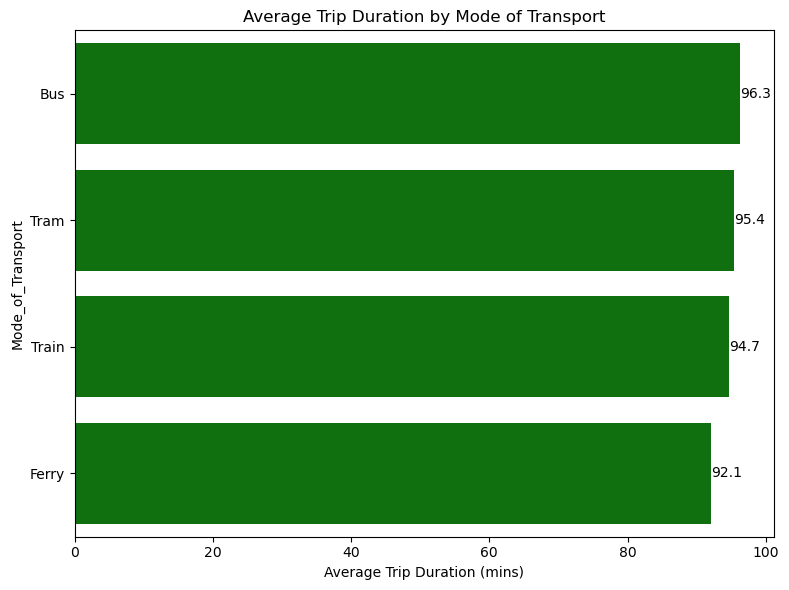

In [114]:
# Aggregate average duration per trip per mode of transport
agg_avg = cleaned_df.groupby('Mode_of_Transport', as_index=False)['Trip_Duration_Minutes'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    y='Mode_of_Transport',
    x='Trip_Duration_Minutes',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Trip_Duration_Minutes', ascending=False)['Mode_of_Transport']
)

# Add labels (average count per trip)
for p in ax.patches:
    width = p.get_width()
    label = f'{width:.1f}'   # keep 1 decimal place
    ax.annotate(label,
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center')

plt.xlabel("Average Trip Duration (mins)")
plt.title("Average Trip Duration by Mode of Transport")
plt.tight_layout()
plt.show()

In [115]:
#As expected, Buses had the greatest overall trip duration, which is expected considering that it was the most available mode of transport.
#On average however, surprisingly, the duration per trip was almost the same across all modes of transport, being only slightly higher for Buses, 
#followed by Trams, Trains and then Ferry in that order. Ferries seemed to be the fastest mode of transport on average

In [116]:
#Question 8: Check to see if a linear relationship exists between fare and duration of trip for each mode of transport

In [117]:
correlations = (
    cleaned_df.groupby("Mode_of_Transport")[["Fare_Amount", "Trip_Duration_Minutes"]]
    .apply(lambda g: g["Fare_Amount"].corr(g["Trip_Duration_Minutes"]))
    .reset_index(name="Correlation")
)

print(correlations)

  Mode_of_Transport  Correlation
0               Bus     0.047572
1             Ferry    -0.021237
2             Train    -0.117090
3              Tram    -0.184105


<Figure size 1200x800 with 0 Axes>

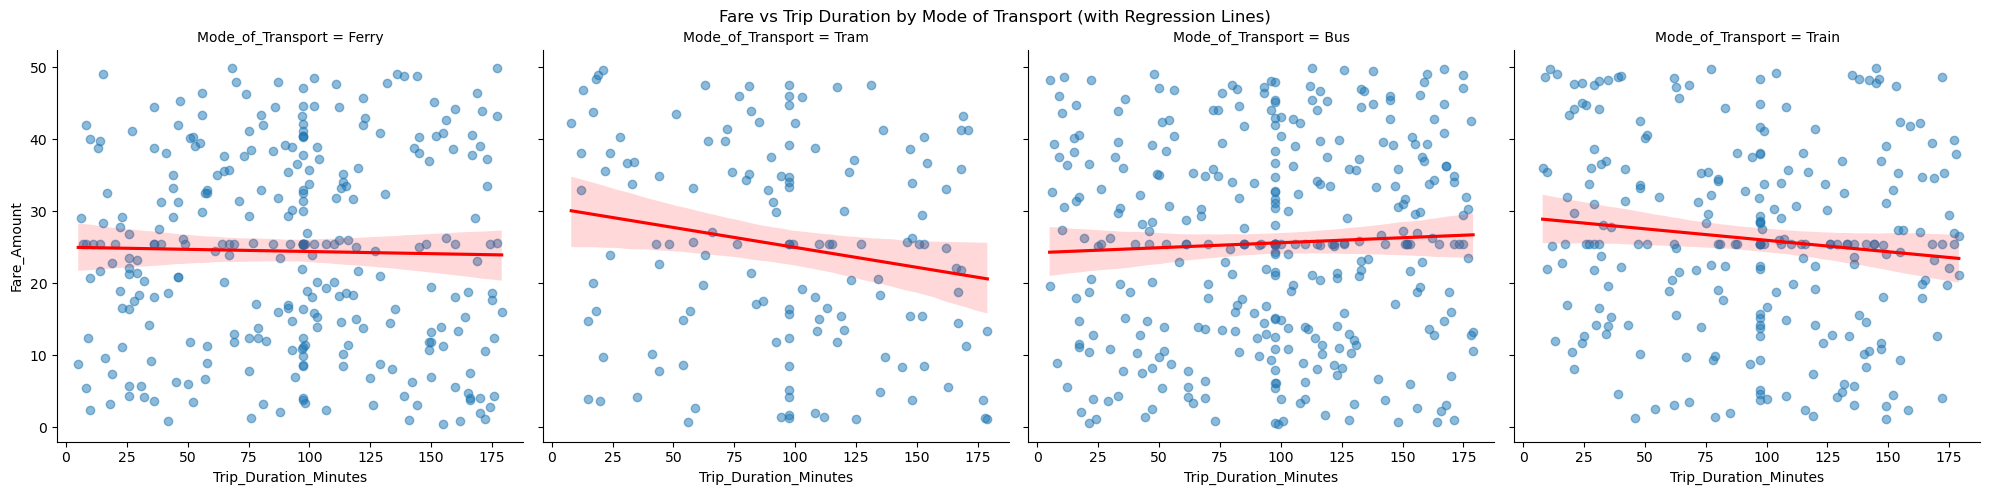

In [118]:
plt.figure(figsize=(12,8))
sns.lmplot(
    data=cleaned_df,
    x="Trip_Duration_Minutes", 
    y="Fare_Amount", 
    col="Mode_of_Transport",   # separate plots per mode
    scatter_kws={'alpha':0.5}, # transparency for better visibility
    line_kws={'color':'red'}
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Fare vs Trip Duration by Mode of Transport (with Regression Lines)")
plt.show()

<Figure size 1000x600 with 0 Axes>

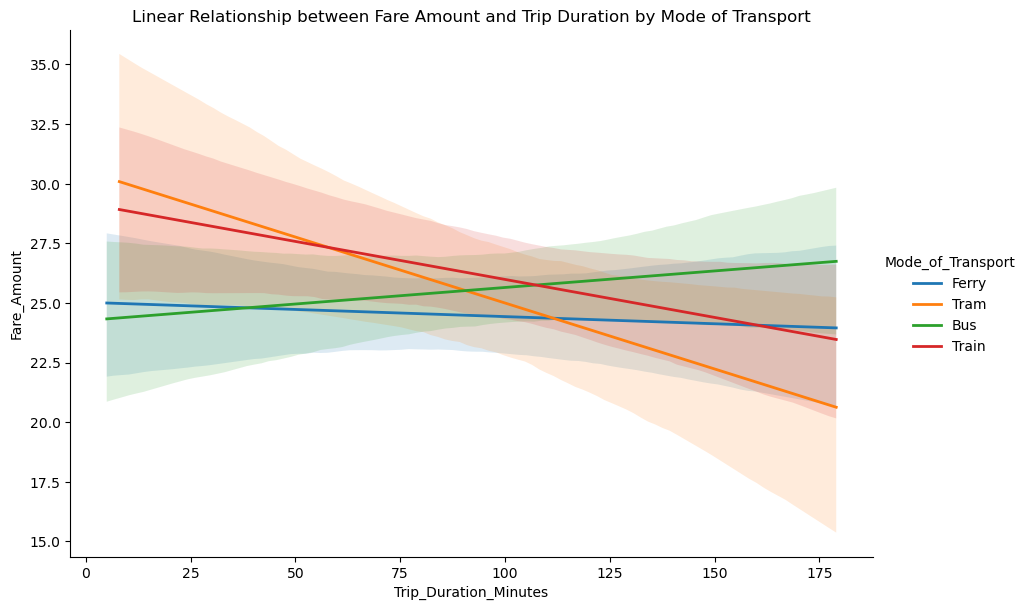

In [119]:
plt.figure(figsize=(10,6))
sns.lmplot(
    data=cleaned_df,
    x="Trip_Duration_Minutes",
    y="Fare_Amount",
    hue="Mode_of_Transport",   # one line per mode
    scatter=False,             # hide scatter points, just lines
    height=6,
    aspect=1.5,
    line_kws={"linewidth":2}
)
plt.title("Linear Relationship between Fare Amount and Trip Duration by Mode of Transport")
plt.show()

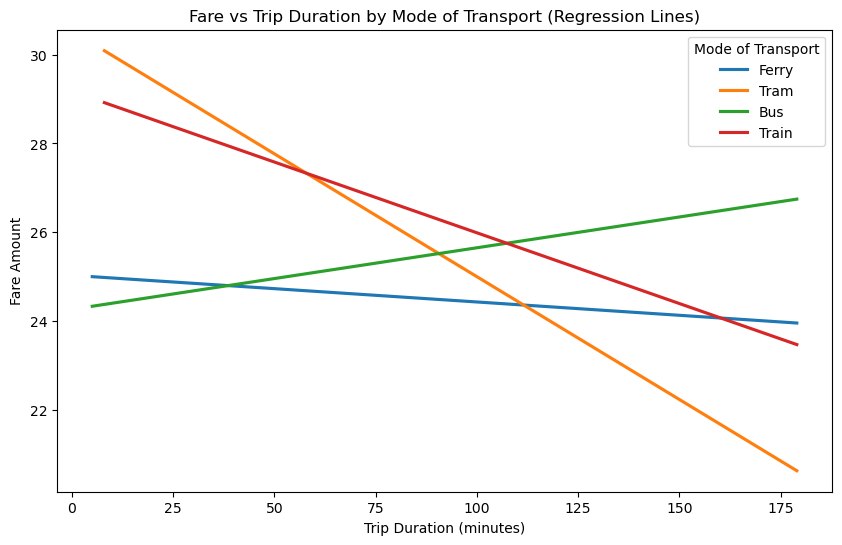

In [120]:
plt.figure(figsize=(10,6))

# Get unique modes
modes = cleaned_df['Mode_of_Transport'].unique()

# Plot regression for each mode
for mode in modes:
    subset = cleaned_df[cleaned_df['Mode_of_Transport'] == mode]
    sns.regplot(
        data=subset,
        x="Trip_Duration_Minutes",
        y="Fare_Amount",
        label=mode,
        scatter=False,     # remove scatter, just the regression line
        ci=None            # remove confidence interval shading
    )

plt.legend(title="Mode of Transport")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.title("Fare vs Trip Duration by Mode of Transport (Regression Lines)")
plt.show()

In [121]:
#Insight: As seen in the charts above, only Buses displays a non existent or very weak positive correlation between the fares and trip duration. 
#The other modes of transport have their fares and trip duration showing a very weak negative correlation if any at all. 

In [122]:
#Question 9: Comparison of Frequency of Mode of Transport on each day of the week

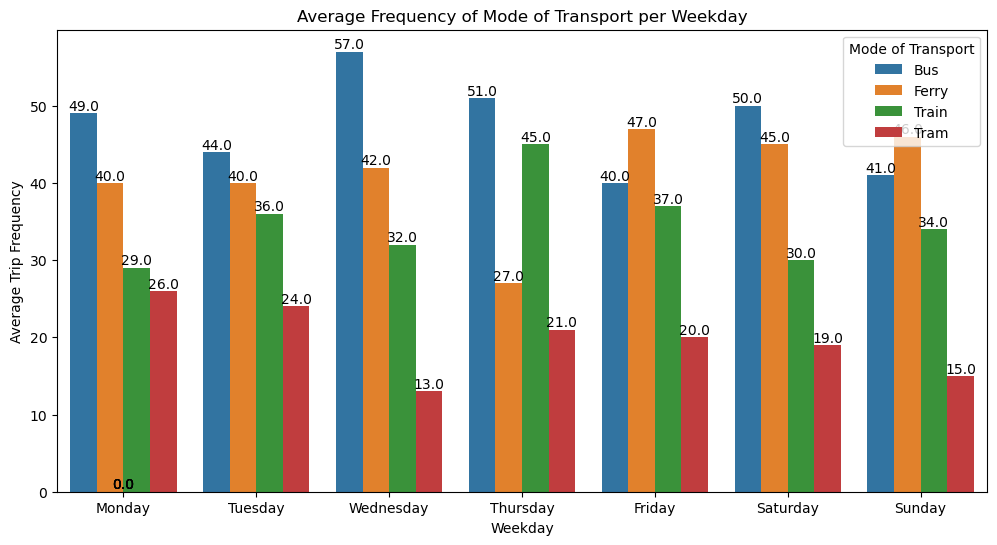

In [123]:
# Count trips per weekday per mode
trip_counts = cleaned_df.groupby(['Weekday', 'Mode_of_Transport']).size().reset_index(name='trip_count')

# Compute average trips per weekday × mode
avg_freq = trip_counts.groupby(['Weekday', 'Mode_of_Transport'], as_index=False)['trip_count'].mean()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x="Weekday",
    y="trip_count",
    hue="Mode_of_Transport",
    data=avg_freq,
    order=weekday_order
)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',                # one decimal place
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')

plt.title("Average Frequency of Mode of Transport per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Trip Frequency")
plt.legend(title="Mode of Transport")
plt.show()

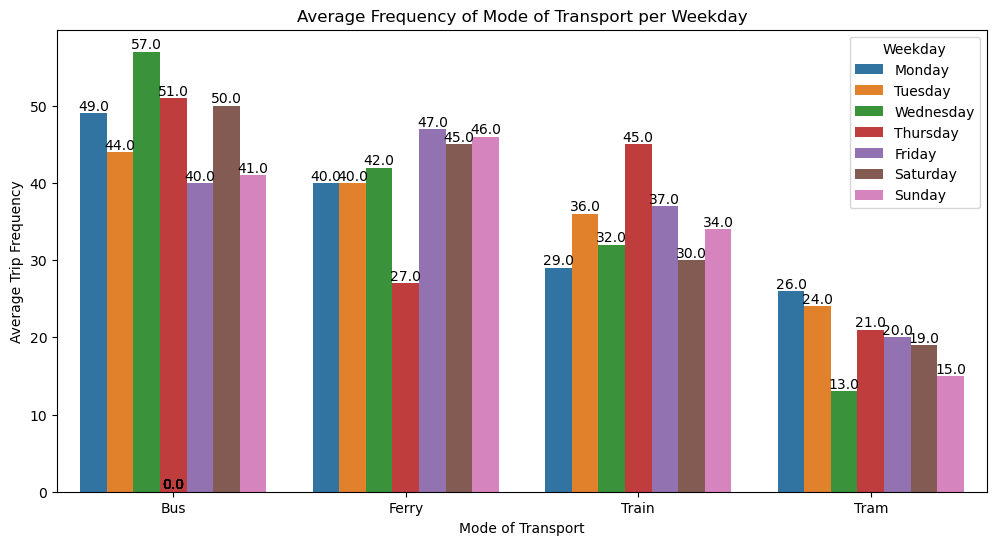

In [124]:
# Count trips per weekday per mode
trip_counts = cleaned_df.groupby(['Mode_of_Transport','Weekday']).size().reset_index(name='trip_count')

# Compute average trips per weekday × mode
avg_freq = trip_counts.groupby(['Mode_of_Transport','Weekday'], as_index=False)['trip_count'].mean()

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x="Mode_of_Transport",
    y="trip_count",
    hue="Weekday",
    data=avg_freq,
    hue_order=weekday_order
)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',                # one decimal place
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')

plt.title("Average Frequency of Mode of Transport per Weekday")
plt.xlabel("Mode of Transport")
plt.ylabel("Average Trip Frequency")
plt.legend(title="Weekday")
plt.show()

In [125]:
#Insight: As seen in the above charts, Buses have the most availability on Wednesdays, Ferry on Fridays, Train on Thursdays,
            # and Tram on Mondays.

In [126]:
#Question 10: Comparison of Passenger Count per weekday for the various Modes of Transport

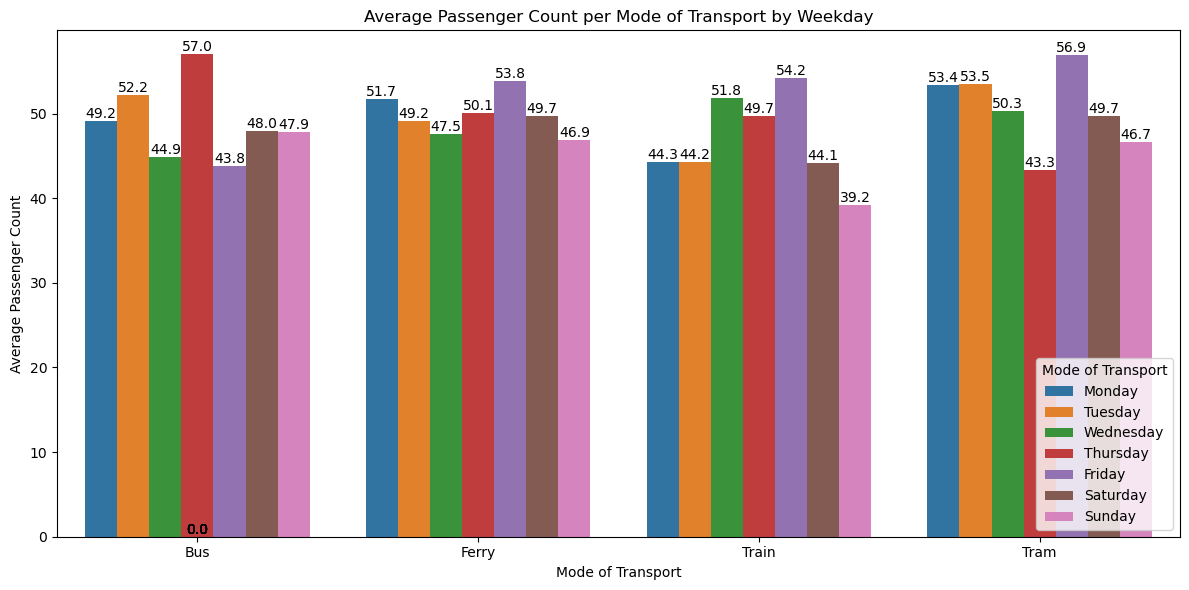

In [127]:
# Aggregate: average passenger count per weekday & transport mode
agg_avg = cleaned_df.groupby(['Mode_of_Transport','Weekday'], as_index=False)['Passenger_Count'].mean()

# Ensure weekdays are ordered correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x="Mode_of_Transport",
    y="Passenger_Count",
    hue="Weekday",
    data=agg_avg,
    hue_order=weekday_order
)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',                # one decimal place
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')

plt.title("Average Passenger Count per Mode of Transport by Weekday")
plt.xlabel("Mode of Transport")
plt.ylabel("Average Passenger Count")
plt.legend(title="Mode of Transport", loc=4)
plt.tight_layout()
plt.show()

In [128]:
#Insight: Thursdays saw the highest usage frequency by Passengers on average for Buses, 
            #while Friday led the weekdays for average highest usage frequency day for all other modes of Transport

In [129]:
#Question 11: Comparison of Revenue per weekday for the various Modes of Transport

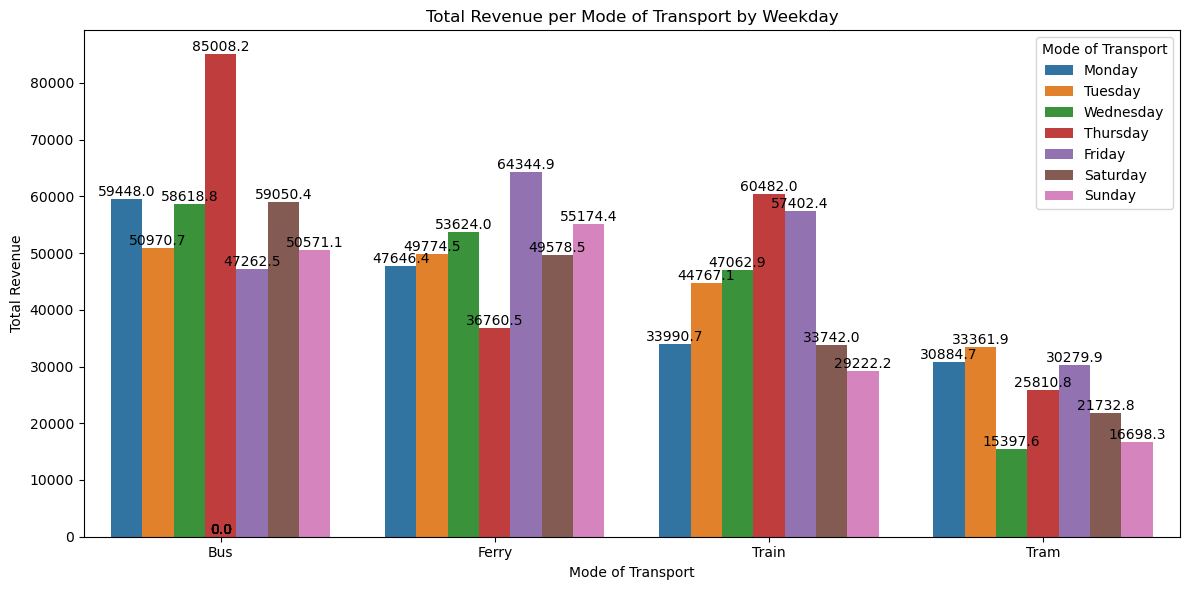

In [130]:
# Aggregate: Total Revenue Amount per weekday & transport mode
agg_total = cleaned_df.groupby(['Mode_of_Transport','Weekday'], as_index=False)['Trip_Revenue'].sum()

# Ensure weekdays are ordered correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x="Mode_of_Transport",
    y="Trip_Revenue",
    hue="Weekday",
    data=agg_total,
    hue_order=weekday_order
)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',                # one decimal place
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')

plt.title("Total Revenue per Mode of Transport by Weekday")
plt.xlabel("Mode of Transport")
plt.ylabel("Total Revenue")
plt.legend(title="Mode of Transport")
plt.tight_layout()
plt.show()

In [131]:
#Insight: Thursdays saw the highest revenue for Buses and Trains while Friday saw the highest revenue for Ferry.

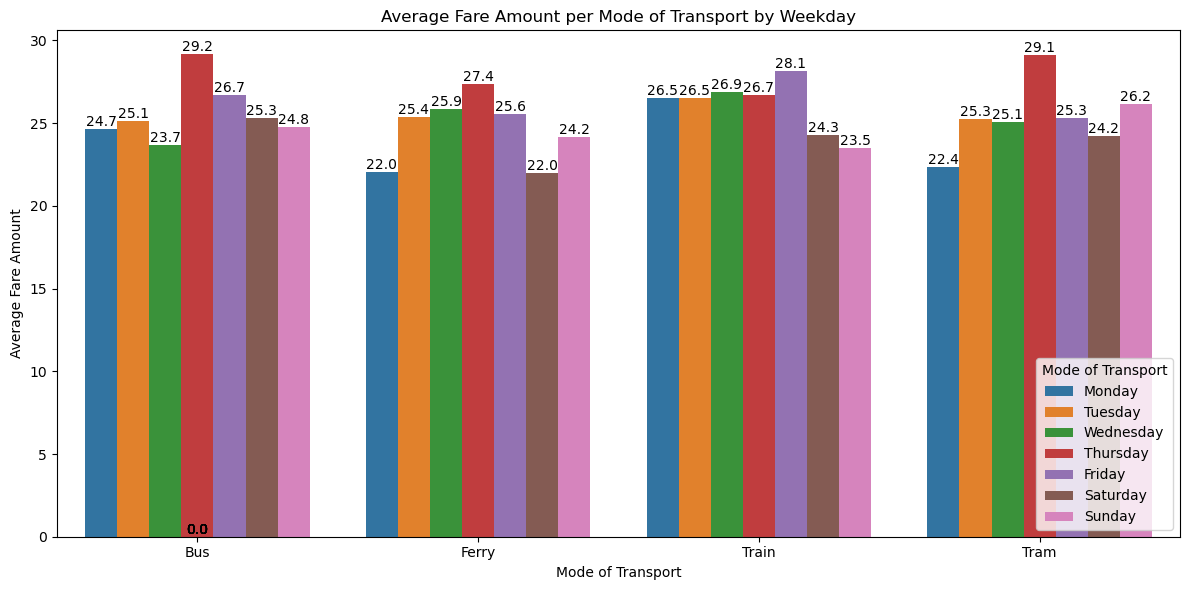

In [132]:
# Aggregate: average Fare Amount per weekday & transport mode
agg_avg = cleaned_df.groupby(['Mode_of_Transport','Weekday'], as_index=False)['Fare_Amount'].mean()

# Ensure weekdays are ordered correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x="Mode_of_Transport",
    y="Fare_Amount",
    hue="Weekday",
    data=agg_avg,
    hue_order=weekday_order
)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',                # one decimal place
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom')

plt.title("Average Fare Amount per Mode of Transport by Weekday")
plt.xlabel("Mode of Transport")
plt.ylabel("Average Fare Amount")
plt.legend(title="Mode of Transport")
plt.tight_layout()
plt.show()

In [133]:
#On average however, Thursdays remained the weekday with the highest fare per trip for Buses and Trams; Ferry included as well.

In [134]:
#Question 12: What is the total passenger count over the specified period?

In [135]:
cleaned_df[['Passenger_Count']].sum()  #Total passenger count over the specified period

Passenger_Count    49039.0
dtype: float64

In [136]:
cleaned_df[['Passenger_Count']].mean()  #Average passenger count per trip over the specified period

Passenger_Count    49.039
dtype: float64

In [137]:
#Question 13: What is the total revenue over the specified period?

In [138]:
cleaned_df['Trip_Revenue'].sum()   #Total Revenue over the specified period

np.float64(1248668.1767184706)

In [139]:
#Question 14: Comparison of frequency of utilisation of departure stations over the period in view

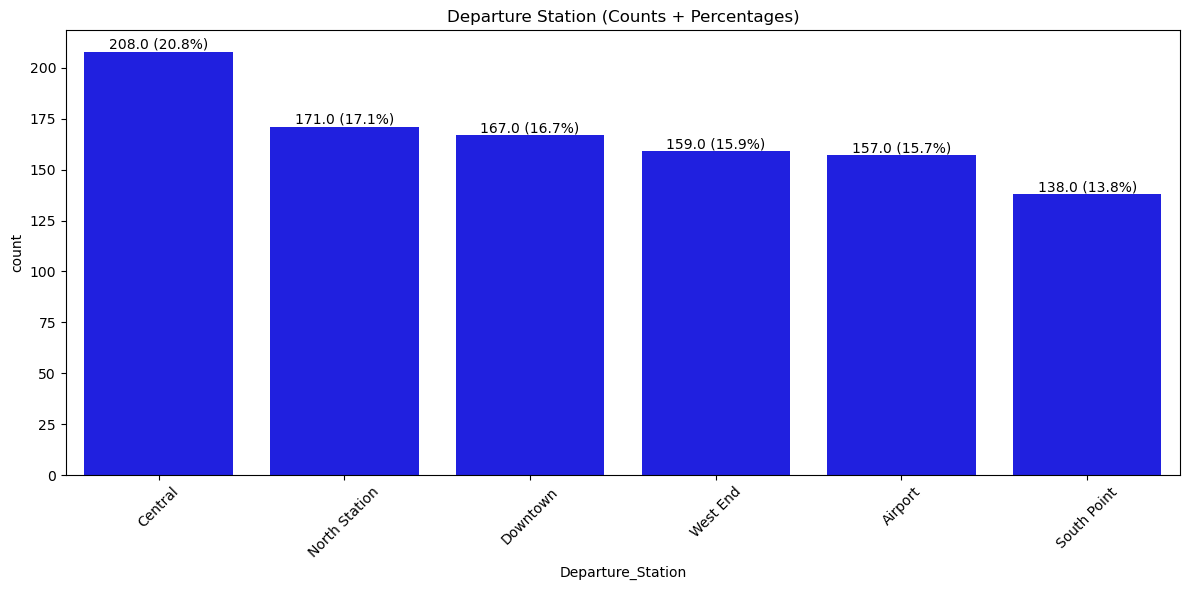

In [140]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Departure_Station", 
                   data=cleaned_df,
                   order=cleaned_df['Departure_Station'].value_counts().index,
                   color="blue")

total = len(cleaned_df['Departure_Station'])

# Format: "count (xx.x%)"
labels = [f'{c.get_height()} ({100*c.get_height()/total:.1f}%)' for c in ax.containers[0]]

ax.bar_label(ax.containers[0], labels=labels)

plt.xticks(rotation=45)
plt.title("Departure Station (Counts + Percentages)")
plt.tight_layout()
plt.show()

In [141]:
#Insight: Central Station topped the chart as the most frequently utilised Departure Station

In [142]:
#Question 15: What Departure Station provided the highest revenue over the specified period?

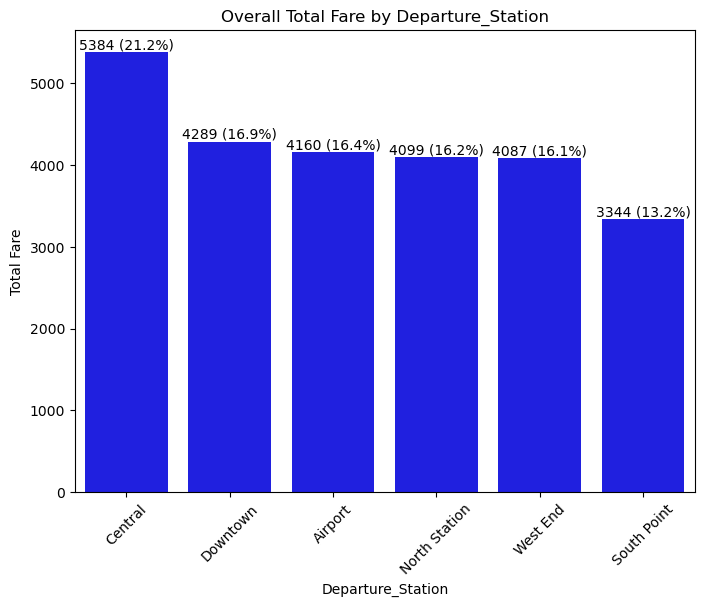

In [143]:
# Aggregate total fare per Departure Station
agg_total = cleaned_df.groupby('Departure_Station', as_index=False)['Fare_Amount'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Departure_Station',
    y='Fare_Amount',
    data=agg_total,
    color='blue',
    order=agg_total.sort_values('Fare_Amount', ascending=False)['Departure_Station']
)

# Add labels (count + percentage of total Departure Station)
total_fare = agg_total['Fare_Amount'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_fare
    label = f'{int(count)} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Total Fare")
plt.title("Overall Total Fare by Departure_Station")
plt.show()

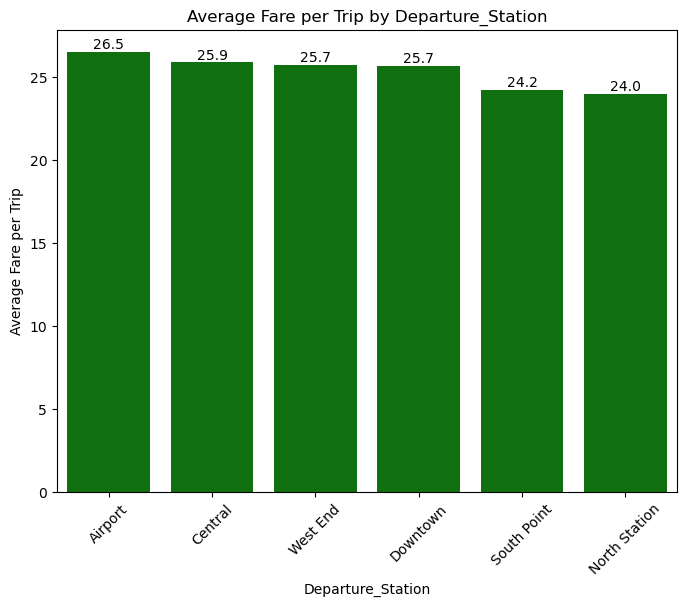

In [144]:
# Aggregate average fare per trip per departure station
agg_avg = cleaned_df.groupby('Departure_Station', as_index=False)['Fare_Amount'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Departure_Station',
    y='Fare_Amount',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Fare_Amount', ascending=False)['Departure_Station']
)

# Add labels (average count per trip)
for p in ax.patches:
    label = f'{p.get_height():.1f}'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Fare per Trip")
plt.title("Average Fare per Trip by Departure_Station")
plt.show()

In [145]:
#Insight: Central Station topped the chart as having the highest total fare of all Departure Station, 
            #however, on average per trip, Airport had the highest fare

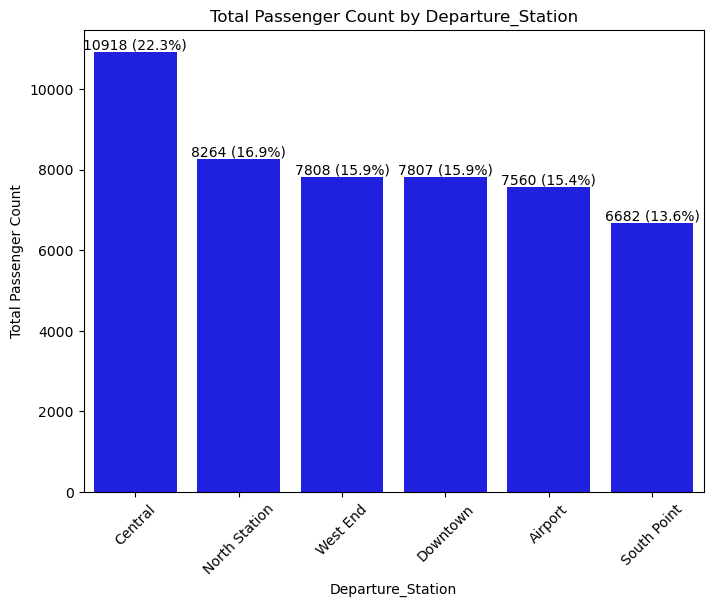

In [146]:
# Aggregate total passengers per departure station
agg_total = cleaned_df.groupby('Departure_Station', as_index=False)['Passenger_Count'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Departure_Station',
    y='Passenger_Count',
    data=agg_total,
    color='blue',
    order=agg_total.sort_values('Passenger_Count', ascending=False)['Departure_Station']
)

# Add labels (count + percentage of total passengers)
total_passengers = agg_total['Passenger_Count'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_passengers
    label = f'{int(count)} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Total Passenger Count")
plt.title("Total Passenger Count by Departure_Station")
plt.show()

In [147]:
#Insight: As expected, Central Station had the highest passenger utilisation of all Departure Stations

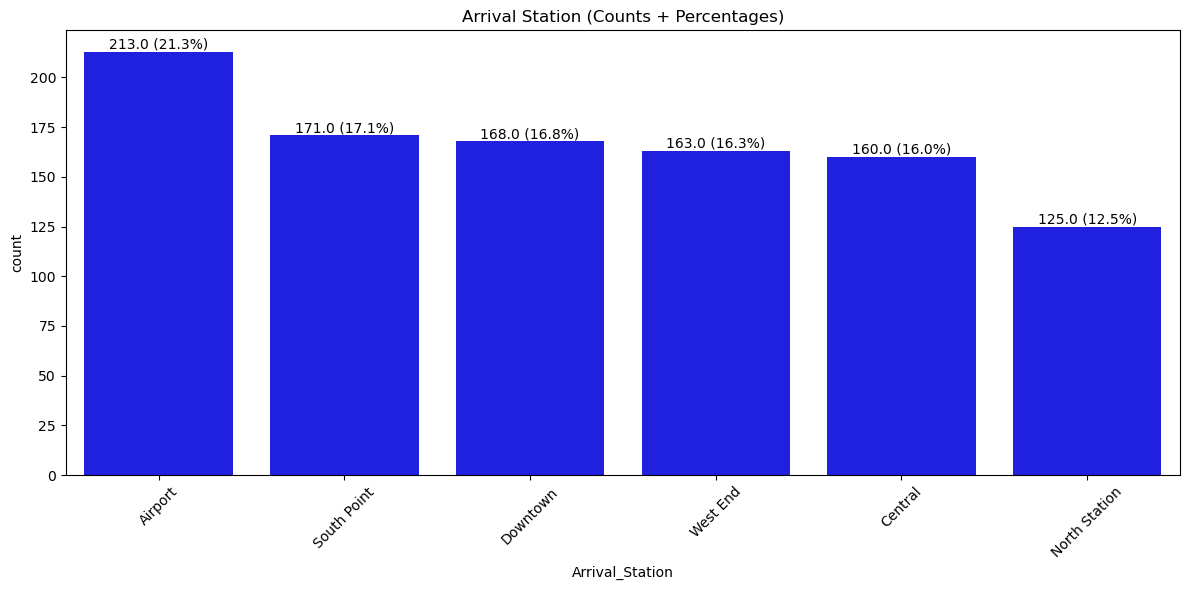

In [148]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Arrival_Station", 
                   data=cleaned_df,
                   order=cleaned_df['Arrival_Station'].value_counts().index,
                   color="blue")

total = len(cleaned_df['Arrival_Station'])

# Format: "count (xx.x%)"
labels = [f'{c.get_height()} ({100*c.get_height()/total:.1f}%)' for c in ax.containers[0]]

ax.bar_label(ax.containers[0], labels=labels)

plt.xticks(rotation=45)
plt.title("Arrival Station (Counts + Percentages)")
plt.tight_layout()
plt.show()

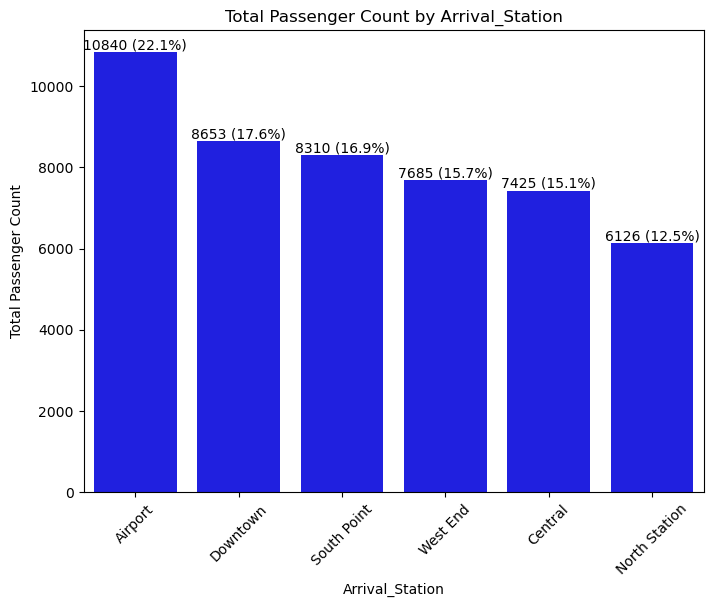

In [149]:
# Aggregate total passengers per arrival station
agg_total = cleaned_df.groupby('Arrival_Station', as_index=False)['Passenger_Count'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Arrival_Station',
    y='Passenger_Count',
    data=agg_total,
    color='blue',
    order=agg_total.sort_values('Passenger_Count', ascending=False)['Arrival_Station']
)

# Add labels (count + percentage of total passengers)
total_passengers = agg_total['Passenger_Count'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_passengers
    label = f'{int(count)} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Total Passenger Count")
plt.title("Total Passenger Count by Arrival_Station")
plt.show()

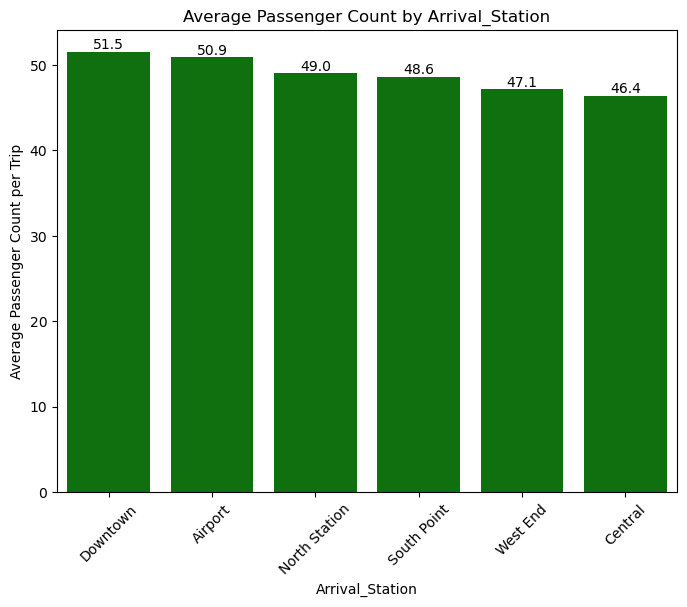

In [150]:
# Aggregate average passengers per trip per arrival station
agg_avg = cleaned_df.groupby('Arrival_Station', as_index=False)['Passenger_Count'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Arrival_Station',
    y='Passenger_Count',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Passenger_Count', ascending=False)['Arrival_Station']
)

# Add labels (average count per trip)
for p in ax.patches:
    label = f'{p.get_height():.1f}'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Passenger Count per Trip")
plt.title("Average Passenger Count by Arrival_Station")
plt.show()

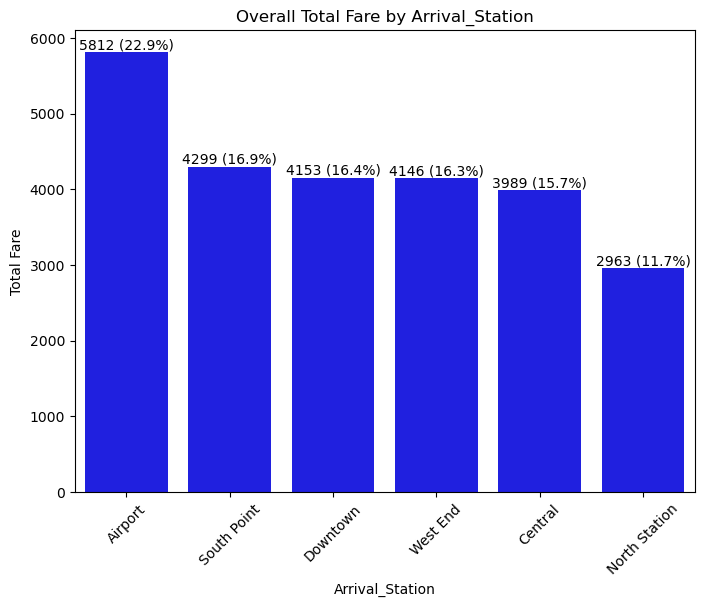

In [151]:
# Aggregate total fare per Arrival Station
agg_total = cleaned_df.groupby('Arrival_Station', as_index=False)['Fare_Amount'].sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Arrival_Station',
    y='Fare_Amount',
    data=agg_total,
    color='blue',
    order=agg_total.sort_values('Fare_Amount', ascending=False)['Arrival_Station']
)

# Add labels (count + percentage of total Arrival Station)
total_fare = agg_total['Fare_Amount'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total_fare
    label = f'{int(count)} ({percentage:.1f}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Total Fare")
plt.title("Overall Total Fare by Arrival_Station")
plt.show()

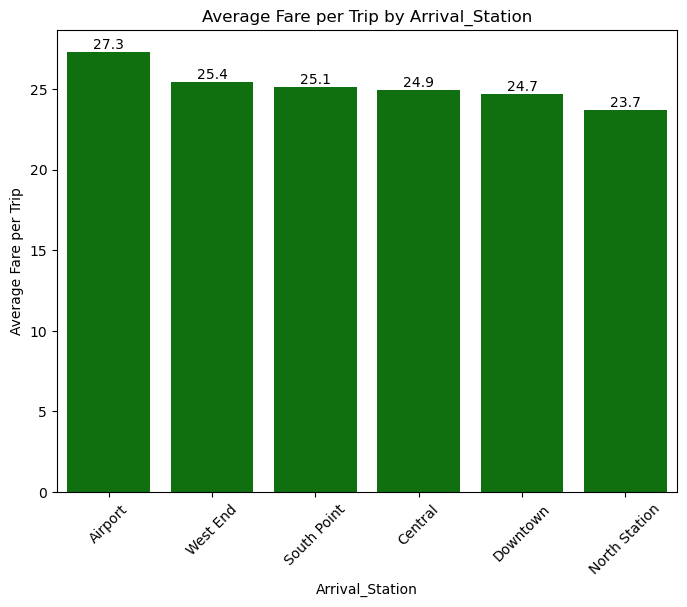

In [152]:
# Aggregate average fare per trip per arrival station
agg_avg = cleaned_df.groupby('Arrival_Station', as_index=False)['Fare_Amount'].mean()

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Arrival_Station',
    y='Fare_Amount',
    data=agg_avg,
    color='green',
    order=agg_avg.sort_values('Fare_Amount', ascending=False)['Arrival_Station']
)

# Add labels (average count per trip)
for p in ax.patches:
    label = f'{p.get_height():.1f}'
    ax.annotate(label,
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel("Average Fare per Trip")
plt.title("Average Fare per Trip by Arrival_Station")
plt.show()

In [153]:
#Insight: The Airport, had the highest availability of all arrival stations, and therefore highest passenger count and utilisation overall, 
            #thus producing the highest revenue. Similarly, the Airport had the highest average fare per trip

In [154]:
numeric_cleaned_df = cleaned_df.select_dtypes(include='number')
numeric_cleaned_df

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Revenue,Fare_per_Minute,Revenue_per_Minute
0,21.0,4.343642,26.0,91.216483,0.167063,3.508326
1,46.0,20.673380,134.0,950.975482,0.154279,7.096832
2,91.0,25.403856,97.5,2311.750939,0.260552,23.710266
3,27.0,3.767487,97.5,101.722157,0.038641,1.043304
4,66.0,25.403856,97.5,1676.654528,0.260552,17.196457
...,...,...,...,...,...,...
995,48.0,40.546670,51.0,1946.240169,0.795033,38.161572
996,63.0,7.772635,35.0,489.676019,0.222075,13.990743
997,23.0,25.403856,8.0,584.288699,3.175482,73.036087
998,9.0,43.300617,169.0,389.705550,0.256217,2.305950


In [155]:
numeric_cleaned_df.corr()

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Revenue,Fare_per_Minute,Revenue_per_Minute
Passenger_Count,1.000000,0.013301,0.020764,0.657956,-0.007782,0.268349
Fare_Amount,0.013301,1.000000,-0.042761,0.673827,0.376899,0.308526
Trip_Duration_Minutes,0.020764,-0.042761,1.000000,0.001426,-0.558612,-0.431631
Trip_Revenue,0.657956,0.673827,0.001426,1.000000,0.248424,0.441290
Fare_per_Minute,-0.007782,0.376899,-0.558612,0.248424,1.000000,0.845681
Revenue_per_Minute,0.268349,0.308526,-0.431631,0.441290,0.845681,1.000000


In [156]:
corr_data3 = cleaned_df.drop(['Trip_ID','Departure_Time','Trip_Date'], axis=1)

In [157]:
corr_data3.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Weekday,Trip_Revenue,Fare_per_Minute,Revenue_per_Minute
0,Ferry,West End,Airport,21.0,4.343642,26.0,Monday,91.216483,0.167063,3.508326
1,Tram,North Station,Downtown,46.0,20.673380,134.0,Monday,950.975482,0.154279,7.096832


In [158]:
!pip install scikit-learn

In [159]:
# List of categorical columns
categorical_cols = ['Mode_of_Transport', 'Departure_Station', 'Arrival_Station', 'Weekday']

# One-hot encode all categorical columns, drop first dummy per column to avoid redundancy
corr_data_encoded = pd.get_dummies(corr_data3, columns=categorical_cols, drop_first=True)

# View first rows
corr_data_encoded.head()

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Revenue,Fare_per_Minute,Revenue_per_Minute,Mode_of_Transport_Ferry,Mode_of_Transport_Train,Mode_of_Transport_Tram,Departure_Station_Central,...,Arrival_Station_Downtown,Arrival_Station_North Station,Arrival_Station_South Point,Arrival_Station_West End,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,21.0,4.343642,26.0,91.216483,0.167063,3.508326,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,46.0,20.673380,134.0,950.975482,0.154279,7.096832,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
2,91.0,25.403856,97.5,2311.750939,0.260552,23.710266,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
3,27.0,3.767487,97.5,101.722157,0.038641,1.043304,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,66.0,25.403856,97.5,1676.654528,0.260552,17.196457,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [160]:
corr_matrix = corr_data_encoded.corr()

In [161]:
corr_matrix

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Revenue,Fare_per_Minute,Revenue_per_Minute,Mode_of_Transport_Ferry,Mode_of_Transport_Train,Mode_of_Transport_Tram,Departure_Station_Central,...,Arrival_Station_Downtown,Arrival_Station_North Station,Arrival_Station_South Point,Arrival_Station_West End,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
Passenger_Count,1.000000,0.013301,0.020764,0.657956,-0.007782,0.268349,0.019342,-0.042742,0.027887,0.067343,...,0.042207,-0.000446,-0.007652,-0.031785,0.009693,-0.017093,-0.057458,0.037347,0.008392,-0.021322
Fare_Amount,0.013301,1.000000,-0.042761,0.673827,0.376899,0.308526,-0.041110,0.032711,-0.003217,0.019450,...,-0.021099,-0.045668,-0.007441,0.002404,-0.044090,-0.043037,-0.027872,0.080357,0.006146,-0.006380
Trip_Duration_Minutes,0.020764,-0.042761,1.000000,0.001426,-0.558612,-0.431631,-0.032602,0.001015,0.006501,0.006473,...,0.004616,0.015797,-0.024691,-0.025746,0.005019,-0.030244,-0.008180,0.023139,-0.064617,0.045857
Trip_Revenue,0.657956,0.673827,0.001426,1.000000,0.248424,0.441290,-0.003152,0.007361,0.005221,0.071593,...,0.005080,-0.032545,0.001572,-0.024597,-0.021734,-0.043545,-0.051553,0.078340,-0.002590,-0.014155
Fare_per_Minute,-0.007782,0.376899,-0.558612,0.248424,1.000000,0.845681,-0.017807,0.008636,0.000216,-0.010575,...,0.000350,-0.022279,0.006818,0.016411,-0.019523,0.036965,0.000395,-0.007663,0.025780,-0.045648
Revenue_per_Minute,0.268349,0.308526,-0.431631,0.441290,0.845681,1.000000,-0.023241,0.007295,-0.001490,0.021741,...,0.001210,-0.023703,0.009842,0.006801,-0.028300,0.024852,0.000549,-0.009561,-0.002016,-0.027135
Mode_of_Transport_Ferry,0.019342,-0.041110,-0.032602,-0.003152,-0.017807,-0.023241,1.000000,-0.359461,-0.253853,-0.047363,...,0.016461,0.054310,0.017162,-0.034599,-0.008362,0.023121,0.044936,-0.090216,-0.008362,0.004231
Mode_of_Transport_Train,-0.042742,0.032711,0.001015,0.007361,0.008636,0.007295,-0.359461,1.000000,-0.226695,0.008364,...,0.038516,-0.059044,-0.022002,0.052967,-0.039793,-0.033152,0.006475,0.066463,0.006694,-0.019870
Mode_of_Transport_Tram,0.027887,-0.003217,0.006501,0.005221,0.000216,-0.001490,-0.253853,-0.226695,1.000000,0.066406,...,-0.024692,-0.037259,0.003096,-0.011727,0.050607,-0.007201,-0.031871,0.009315,0.034090,-0.056751
Departure_Station_Central,0.067343,0.019450,0.006473,0.071593,-0.010575,0.021741,-0.047363,0.008364,0.066406,1.000000,...,-0.012811,0.081948,0.009371,-0.032711,-0.041769,-0.034751,0.012305,-0.013698,0.000337,0.049460


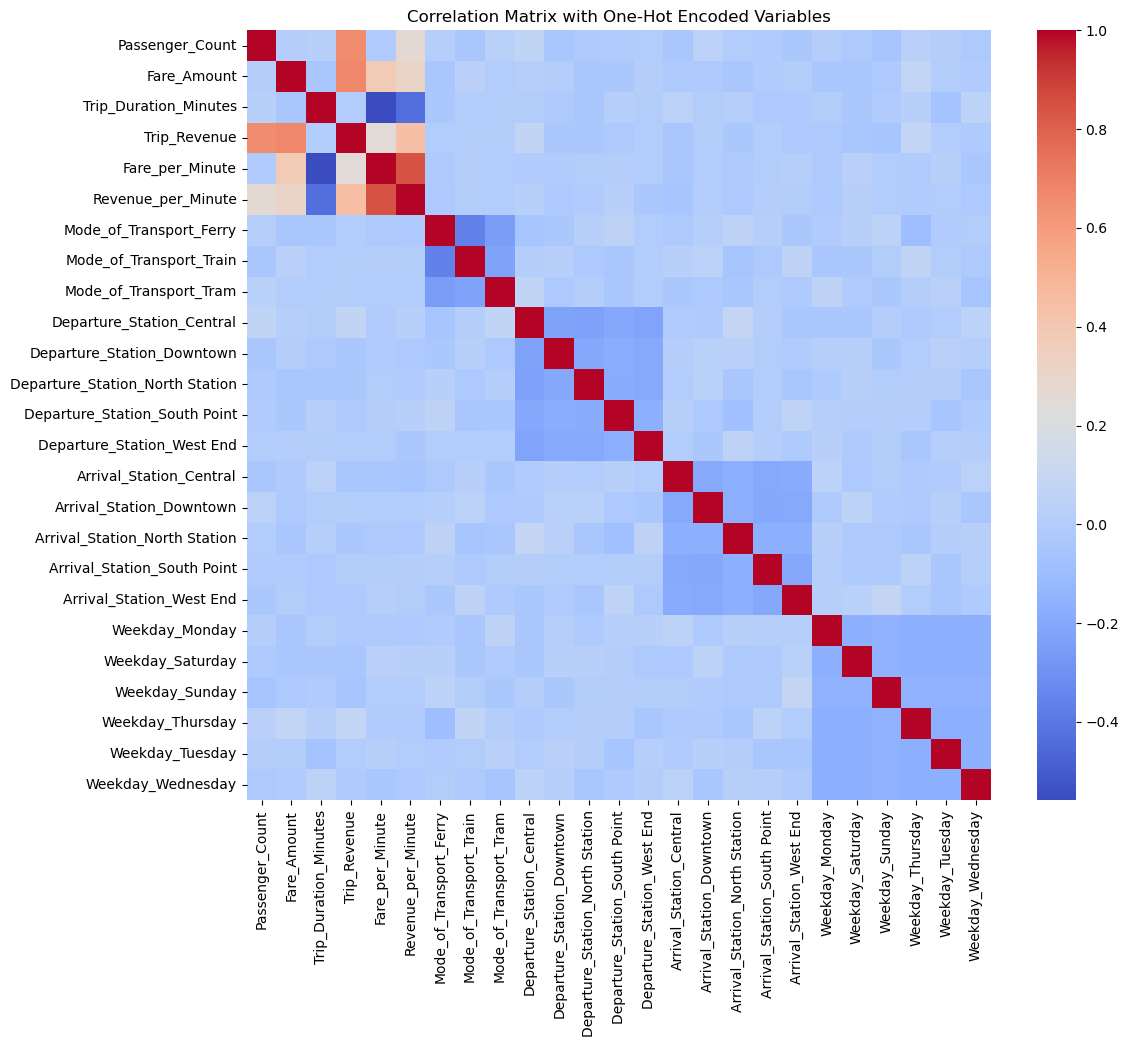

In [162]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix with One-Hot Encoded Variables")
plt.show()

In [163]:
# List of categorical columns
categorical_cols = ['Mode_of_Transport', 'Departure_Station', 'Arrival_Station', 'Weekday']

# One-hot encode all categorical columns
corr_data_encoded2 = pd.get_dummies(corr_data3, columns=categorical_cols)

# View first rows
corr_data_encoded2.head()

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Revenue,Fare_per_Minute,Revenue_per_Minute,Mode_of_Transport_Bus,Mode_of_Transport_Ferry,Mode_of_Transport_Train,Mode_of_Transport_Tram,...,Arrival_Station_North Station,Arrival_Station_South Point,Arrival_Station_West End,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,21.0,4.343642,26.0,91.216483,0.167063,3.508326,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,46.0,20.673380,134.0,950.975482,0.154279,7.096832,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,91.0,25.403856,97.5,2311.750939,0.260552,23.710266,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,27.0,3.767487,97.5,101.722157,0.038641,1.043304,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,66.0,25.403856,97.5,1676.654528,0.260552,17.196457,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [164]:
corr_matrix2 = corr_data_encoded2.corr()

In [165]:
corr_matrix2

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Revenue,Fare_per_Minute,Revenue_per_Minute,Mode_of_Transport_Bus,Mode_of_Transport_Ferry,Mode_of_Transport_Train,Mode_of_Transport_Tram,...,Arrival_Station_North Station,Arrival_Station_South Point,Arrival_Station_West End,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
Passenger_Count,1.000000,0.013301,0.020764,0.657956,-0.007782,0.268349,-0.000077,0.019342,-0.042742,0.027887,...,-0.000446,-0.007652,-0.031785,0.039082,0.009693,-0.017093,-0.057458,0.037347,0.008392,-0.021322
Fare_Amount,0.013301,1.000000,-0.042761,0.673827,0.376899,0.308526,0.012054,-0.041110,0.032711,-0.003217,...,-0.045668,-0.007441,0.002404,0.034217,-0.044090,-0.043037,-0.027872,0.080357,0.006146,-0.006380
Trip_Duration_Minutes,0.020764,-0.042761,1.000000,0.001426,-0.558612,-0.431631,0.025631,-0.032602,0.001015,0.006501,...,0.015797,-0.024691,-0.025746,0.028833,0.005019,-0.030244,-0.008180,0.023139,-0.064617,0.045857
Trip_Revenue,0.657956,0.673827,0.001426,1.000000,0.248424,0.441290,-0.007500,-0.003152,0.007361,0.005221,...,-0.032545,0.001572,-0.024597,0.054018,-0.021734,-0.043545,-0.051553,0.078340,-0.002590,-0.014155
Fare_per_Minute,-0.007782,0.376899,-0.558612,0.248424,1.000000,0.845681,0.009082,-0.017807,0.008636,0.000216,...,-0.022279,0.006818,0.016411,0.009704,-0.019523,0.036965,0.000395,-0.007663,0.025780,-0.045648
Revenue_per_Minute,0.268349,0.308526,-0.431631,0.441290,0.845681,1.000000,0.016772,-0.023241,0.007295,-0.001490,...,-0.023703,0.009842,0.006801,0.041623,-0.028300,0.024852,0.000549,-0.009561,-0.002016,-0.027135
Mode_of_Transport_Bus,-0.000077,0.012054,0.025631,-0.007500,0.009082,0.016772,1.000000,-0.447277,-0.399426,-0.282076,...,0.028893,0.001286,-0.006416,-0.047224,0.007209,0.013258,-0.025720,0.019306,-0.023031,0.055595
Mode_of_Transport_Ferry,0.019342,-0.041110,-0.032602,-0.003152,-0.017807,-0.023241,-0.447277,1.000000,-0.359461,-0.253853,...,0.054310,0.017162,-0.034599,0.035713,-0.008362,0.023121,0.044936,-0.090216,-0.008362,0.004231
Mode_of_Transport_Train,-0.042742,0.032711,0.001015,0.007361,0.008636,0.007295,-0.399426,-0.359461,1.000000,-0.226695,...,-0.059044,-0.022002,0.052967,0.013335,-0.039793,-0.033152,0.006475,0.066463,0.006694,-0.019870
Mode_of_Transport_Tram,0.027887,-0.003217,0.006501,0.005221,0.000216,-0.001490,-0.282076,-0.253853,-0.226695,1.000000,...,-0.037259,0.003096,-0.011727,0.001057,0.050607,-0.007201,-0.031871,0.009315,0.034090,-0.056751


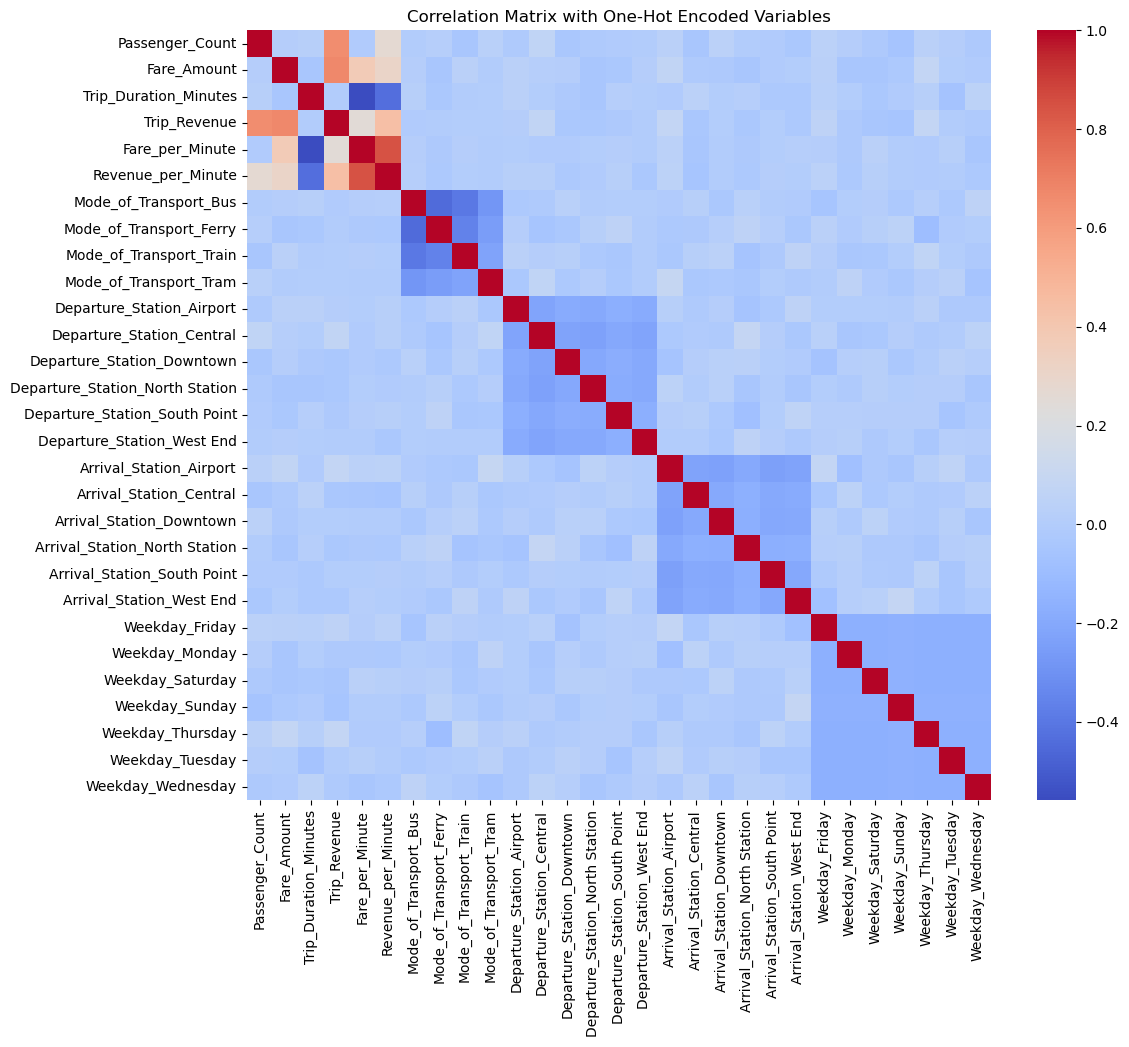

In [166]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix2, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix with One-Hot Encoded Variables")
plt.show()

In [167]:
from scipy.stats import chi2_contingency, pointbiserialr

In [168]:
def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

In [169]:
numeric_cols = corr_data3.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['Mode_of_Transport', 'Departure_Station', 'Arrival_Station', 'Weekday']
all_cols = numeric_cols + categorical_cols

In [170]:
assoc_matrix = pd.DataFrame(np.zeros((len(all_cols), len(all_cols))),
                            index=all_cols, columns=all_cols)

In [171]:
for col1 in all_cols:
    for col2 in all_cols:
        if col1 in numeric_cols and col2 in numeric_cols:
            # Numeric-Numeric: Pearson
            assoc_matrix.loc[col1, col2] = corr_data3[col1].corr(corr_data3[col2])
        elif col1 in categorical_cols and col2 in categorical_cols:
            # Categorical-Categorical: Cramér's V
            assoc_matrix.loc[col1, col2] = cramers_v(corr_data3[col1], corr_data3[col2])
        else:
            # Categorical-Numeric: point-biserial
            if col1 in categorical_cols:
                # col1 categorical, col2 numeric
                # Convert col1 to dummy 0/1 for each category
                dummies = pd.get_dummies(corr_data3[col1], drop_first=True)
                # Take max correlation across all dummies (approximation)
                corr_val = max(dummies.apply(lambda d: d.corr(corr_data3[col2])))
                assoc_matrix.loc[col1, col2] = corr_val
            else:
                # col2 categorical, col1 numeric
                dummies = pd.get_dummies(corr_data3[col2], drop_first=True)
                corr_val = max(dummies.apply(lambda d: d.corr(corr_data3[col1])))
                assoc_matrix.loc[col1, col2] = corr_val

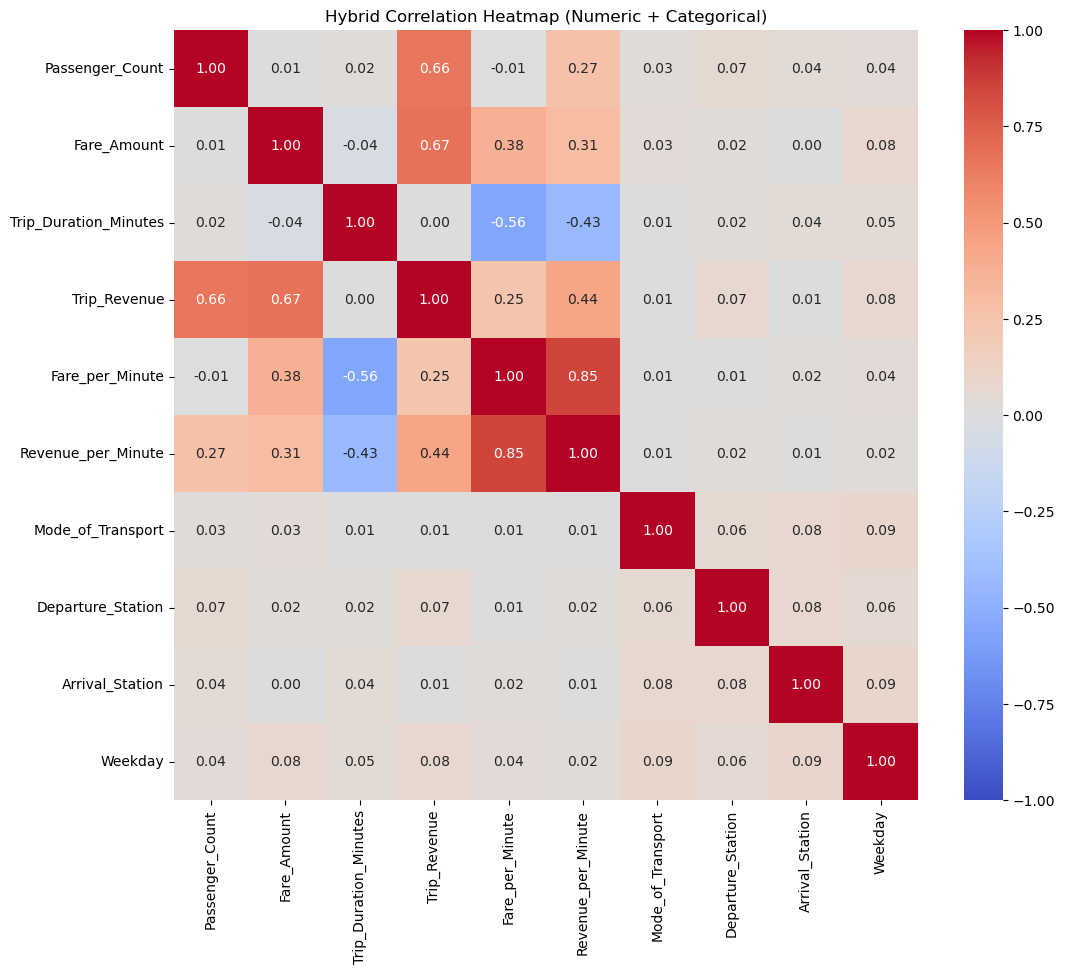

In [172]:
plt.figure(figsize=(12,10))
sns.heatmap(assoc_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Hybrid Correlation Heatmap (Numeric + Categorical)")
plt.show()

In [173]:
#Recommendations:

#1. Revisit Fare Policy: Since fare does not scale well with duration, consider aligning price more transparently with trip length
#2. Promote Ferries: As the cheapest per minute mode, ferries can be marketed as a cost alternative to buses/trains
#3. Optimize Capacity: Trams and Ferries had the cheapest fees and highest passenger count on average per trip, whereas the buses were the most available. 
    #Therefore, consider reallocating resources to make more trams and ferries available so that average cost per trip could be lowered for passengers. 
    #Also, Trams had the highest revenue on average per trip, so making it more available could potentially result in greater revenue.
#4. Ensure collection of more accurate trip data records in the future, especially with regards to trip date and time of departure.

In [174]:
#Conclusion:

#1. Passenger counts are slightly tilted towards the cheaper modes on average.
#2. Trains and Buses cost more per minute, while Ferries are cheapest.
#3. Fare and duration are weakly related — opportunity for restructuring.
#4. Data-driven adjustments to pricing and capacity can enhance efficiency and passenger satisfaction.

# A subtle observation worth noting is that there could have been more bus trips because passengers preferred to take the bus
# rather than because it was more available. 
# We do not know for sure the exact reason for the greter frequency of one mode of transport compared to the others.